In [5]:
run pyabc_calib.py

INFO:Sampler:Parallelizing the sampling on 16 cores.
INFO:History:Start <ABCSMC(id=50, start_time=2021-01-07 14:12:23.459247, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 73.6221899990355
INFO:ABC:t: 0, eps: 73.6221899990355.
INFO:ABC:Acceptance rate: 15 / 72 = 2.0833e-01, ESS=1.5000e+01.
INFO:ABC:t: 1, eps: 62.46568568003808.
INFO:ABC:Acceptance rate: 15 / 133 = 1.1278e-01, ESS=6.4563e+00.
INFO:ABC:t: 2, eps: 57.54191956370555.
INFO:ABC:Acceptance rate: 15 / 216 = 6.9444e-02, ESS=5.1999e+00.
INFO:ABC:t: 3, eps: 49.849198989117106.
INFO:ABC:Acceptance rate: 15 / 257 = 5.8366e-02, ESS=1.0555e+00.
INFO:ABC:t: 4, eps: 49.03304667684267.
INFO:ABC:Acceptance rate: 15 / 198 = 7.5758e-02, ESS=1.7670e+00.
INFO:ABC:t: 5, eps: 39.985822711654535.
INFO:ABC:Stopping: sample not ok.
INFO:History:Done <ABCSMC(id=50, start_time=2021-01-07 14:12:23.459247, end_time=2021-01-07 15:49:49.806472)>


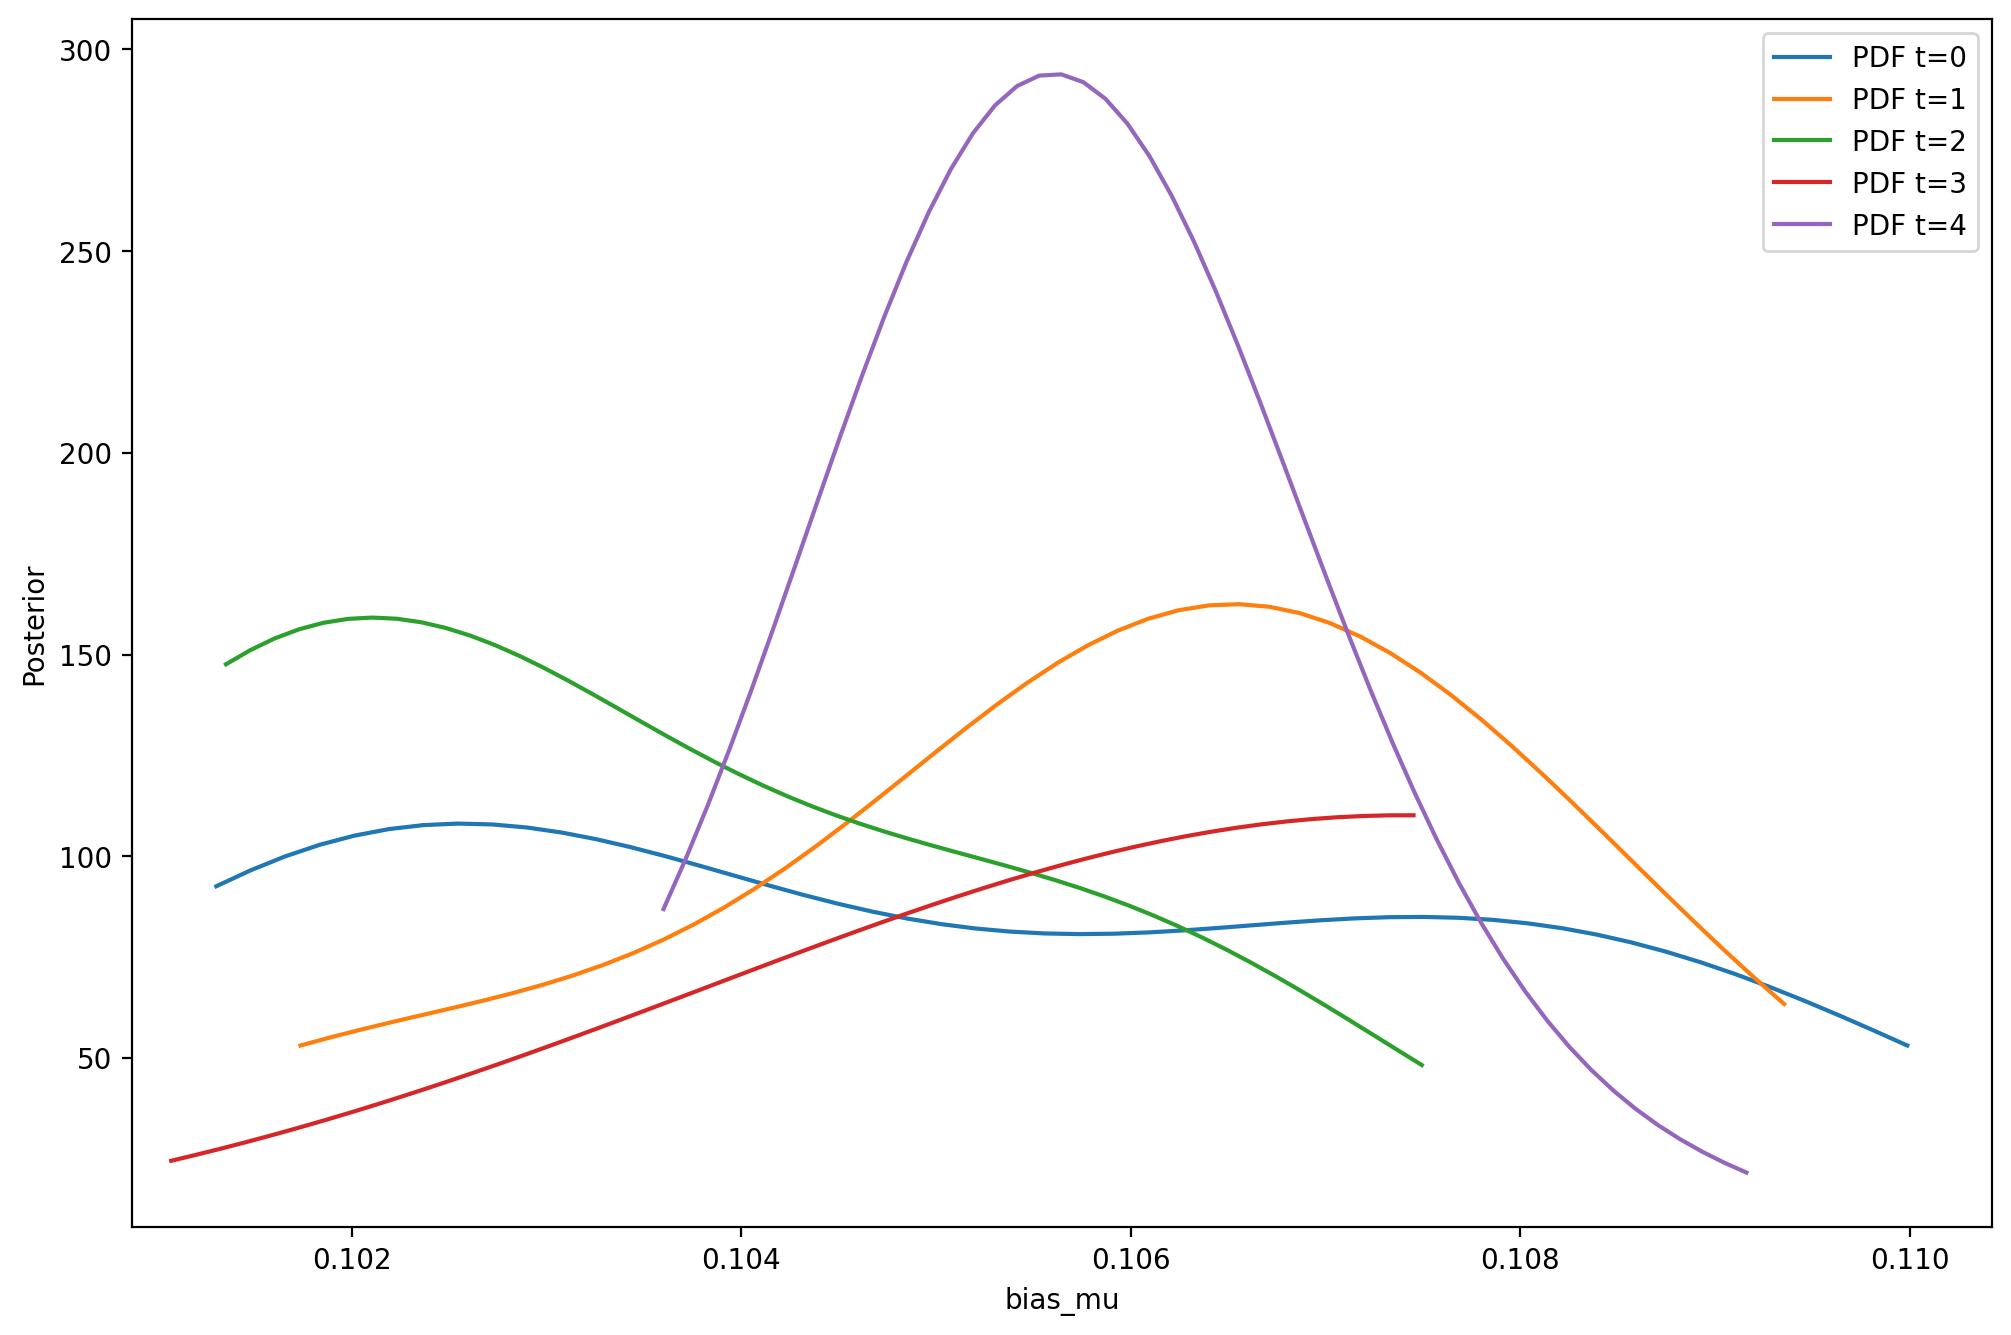

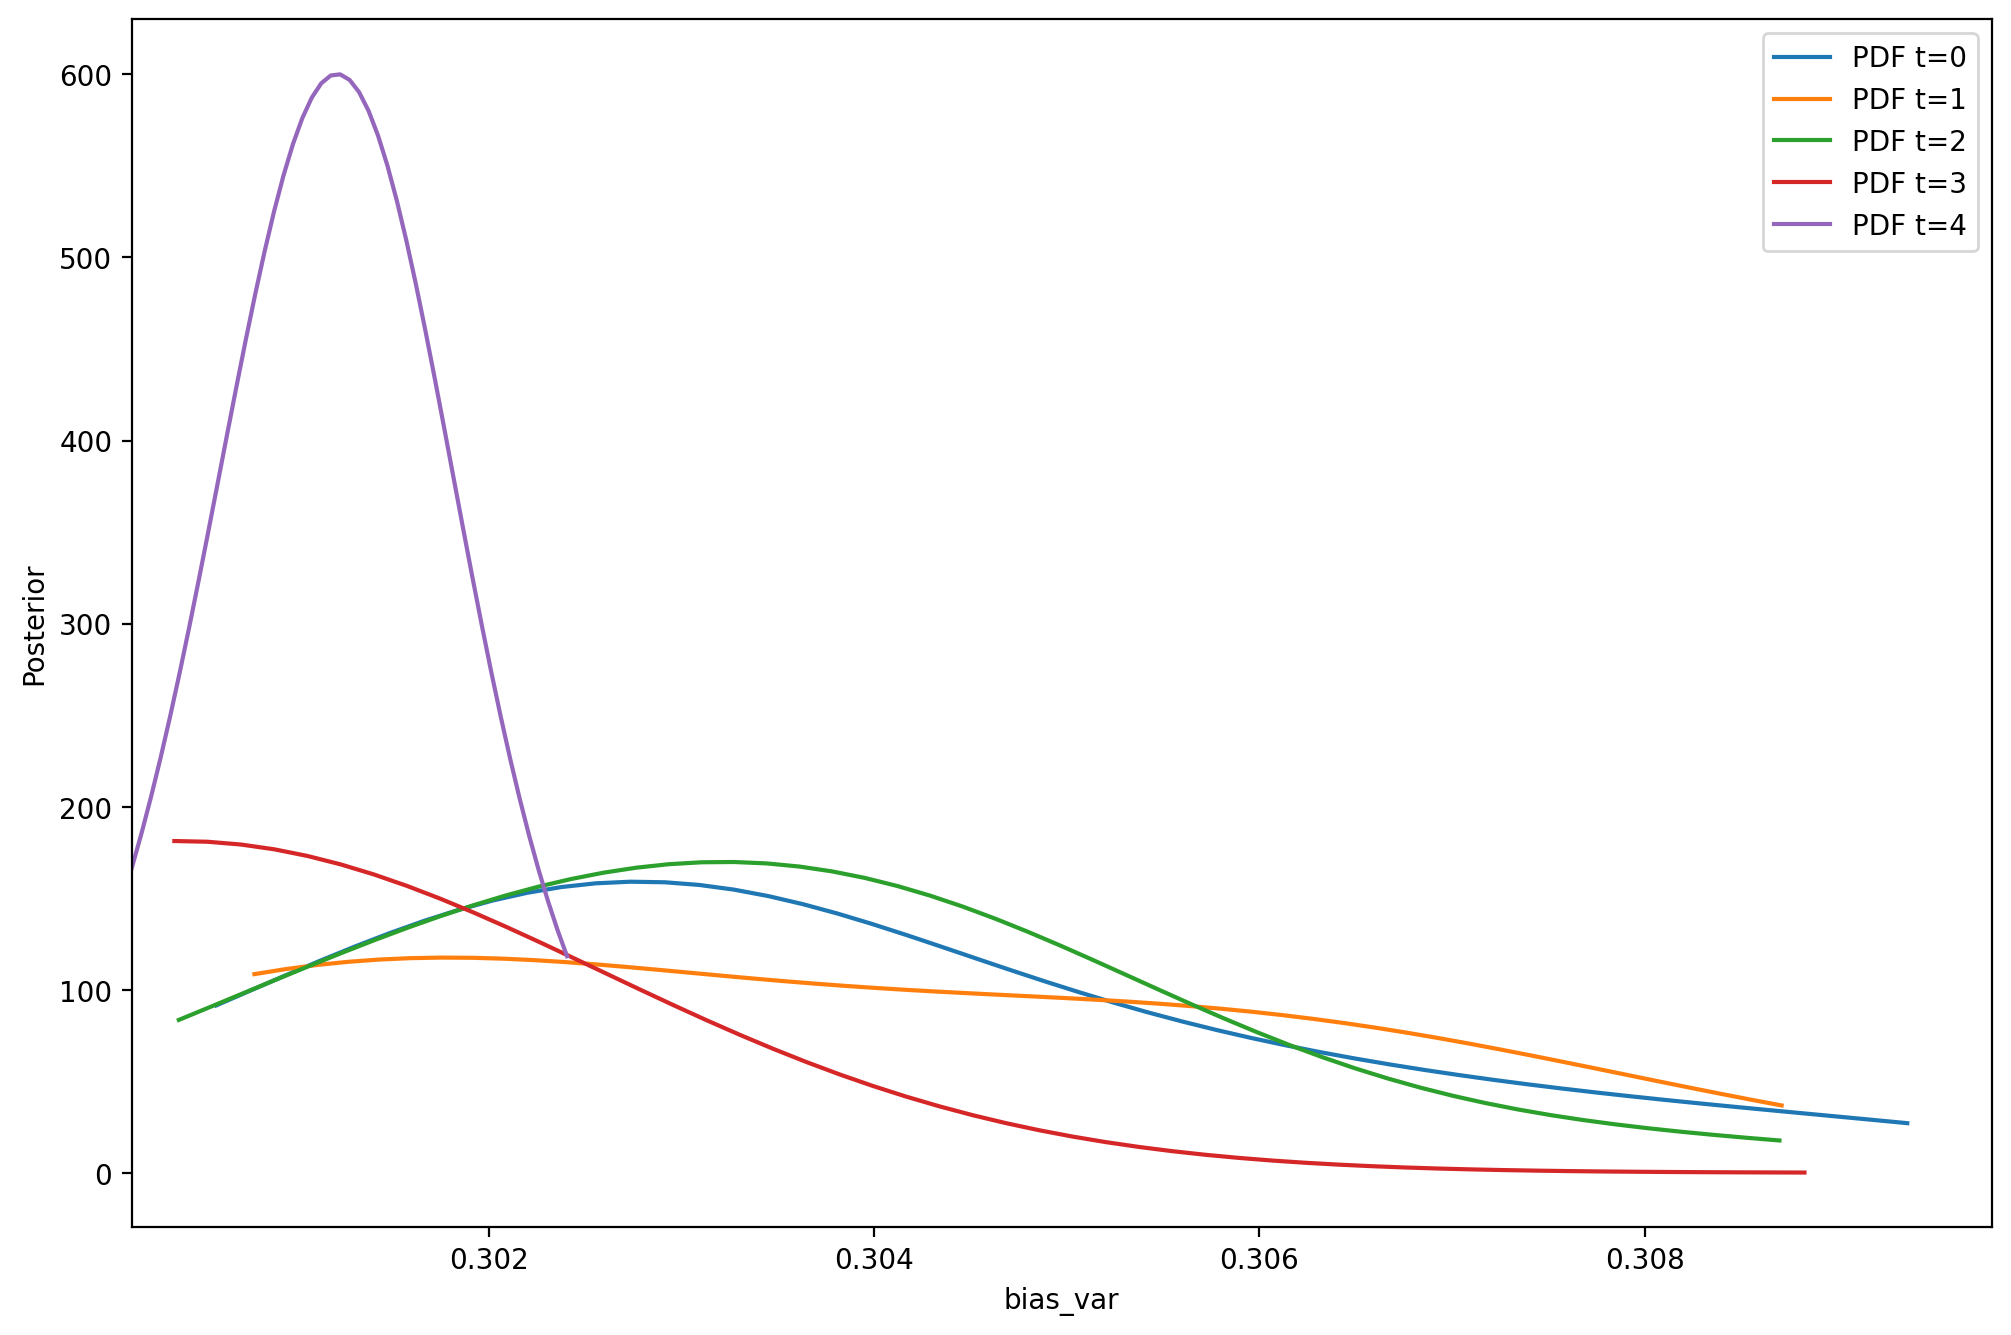

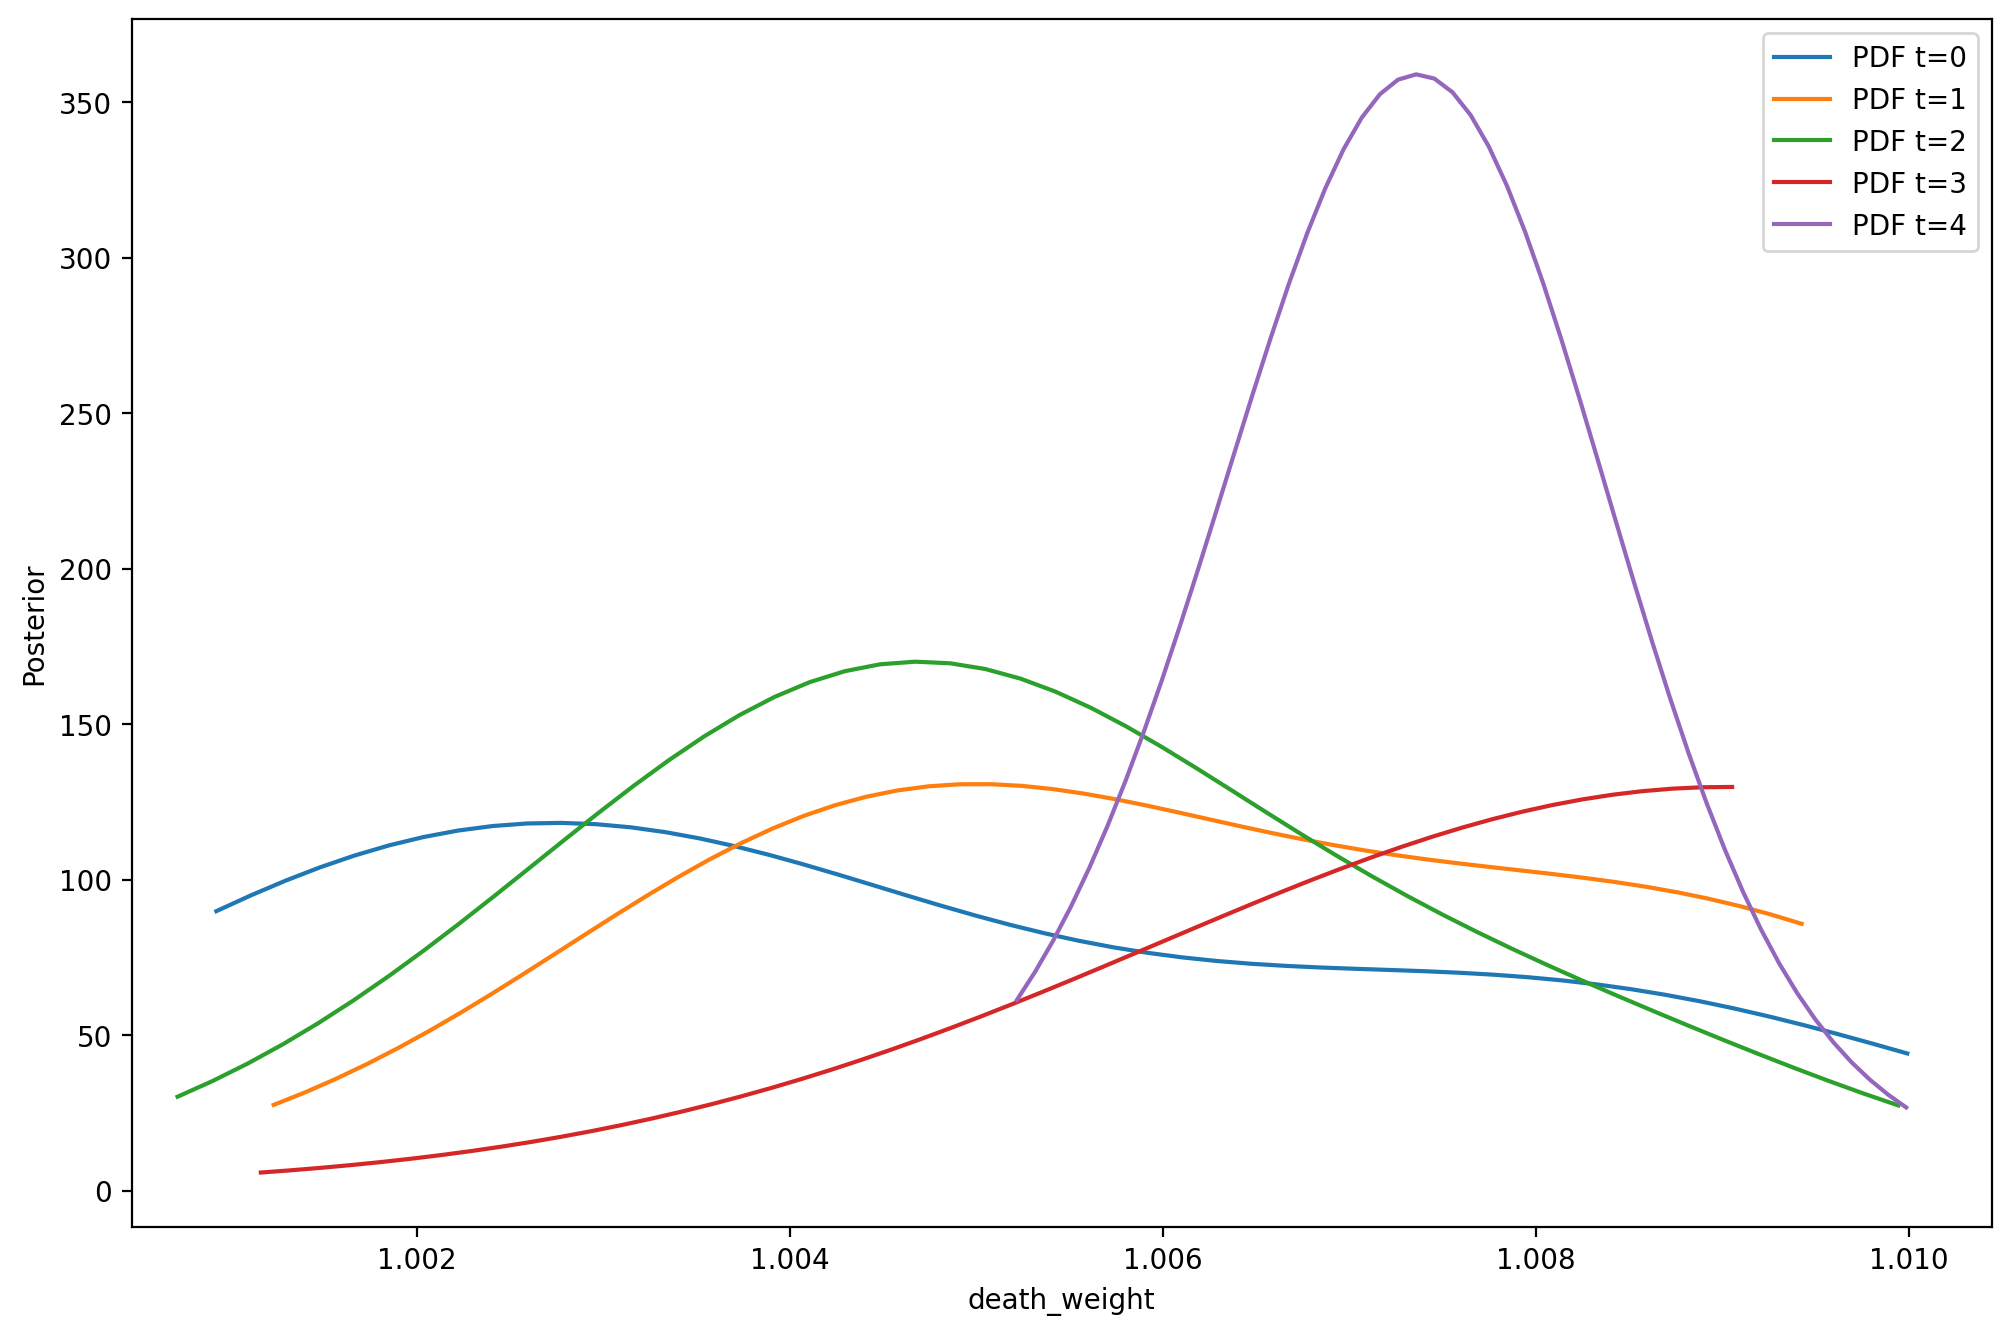

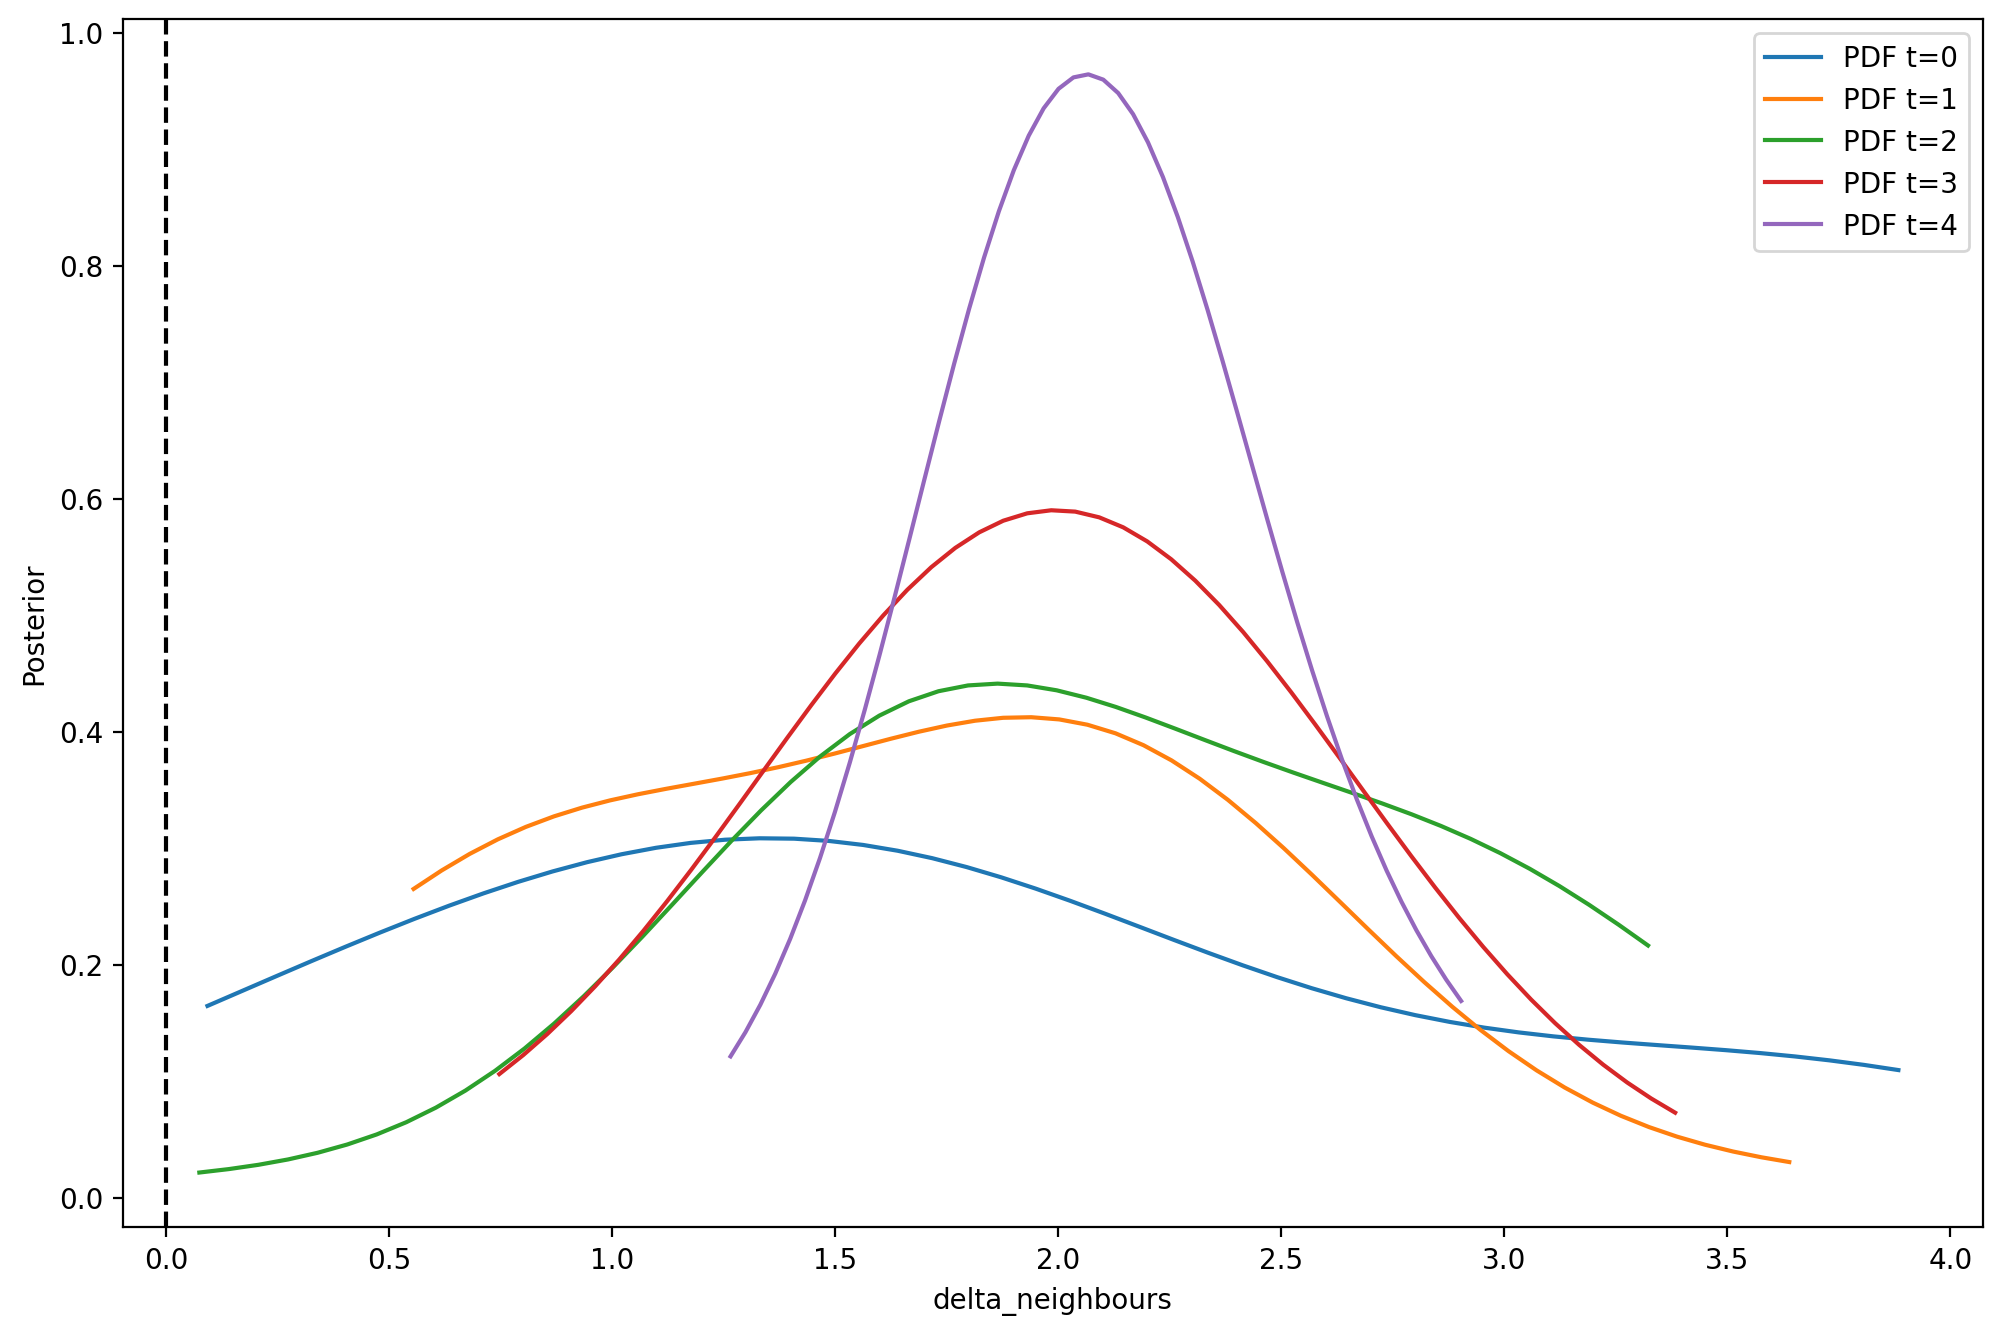

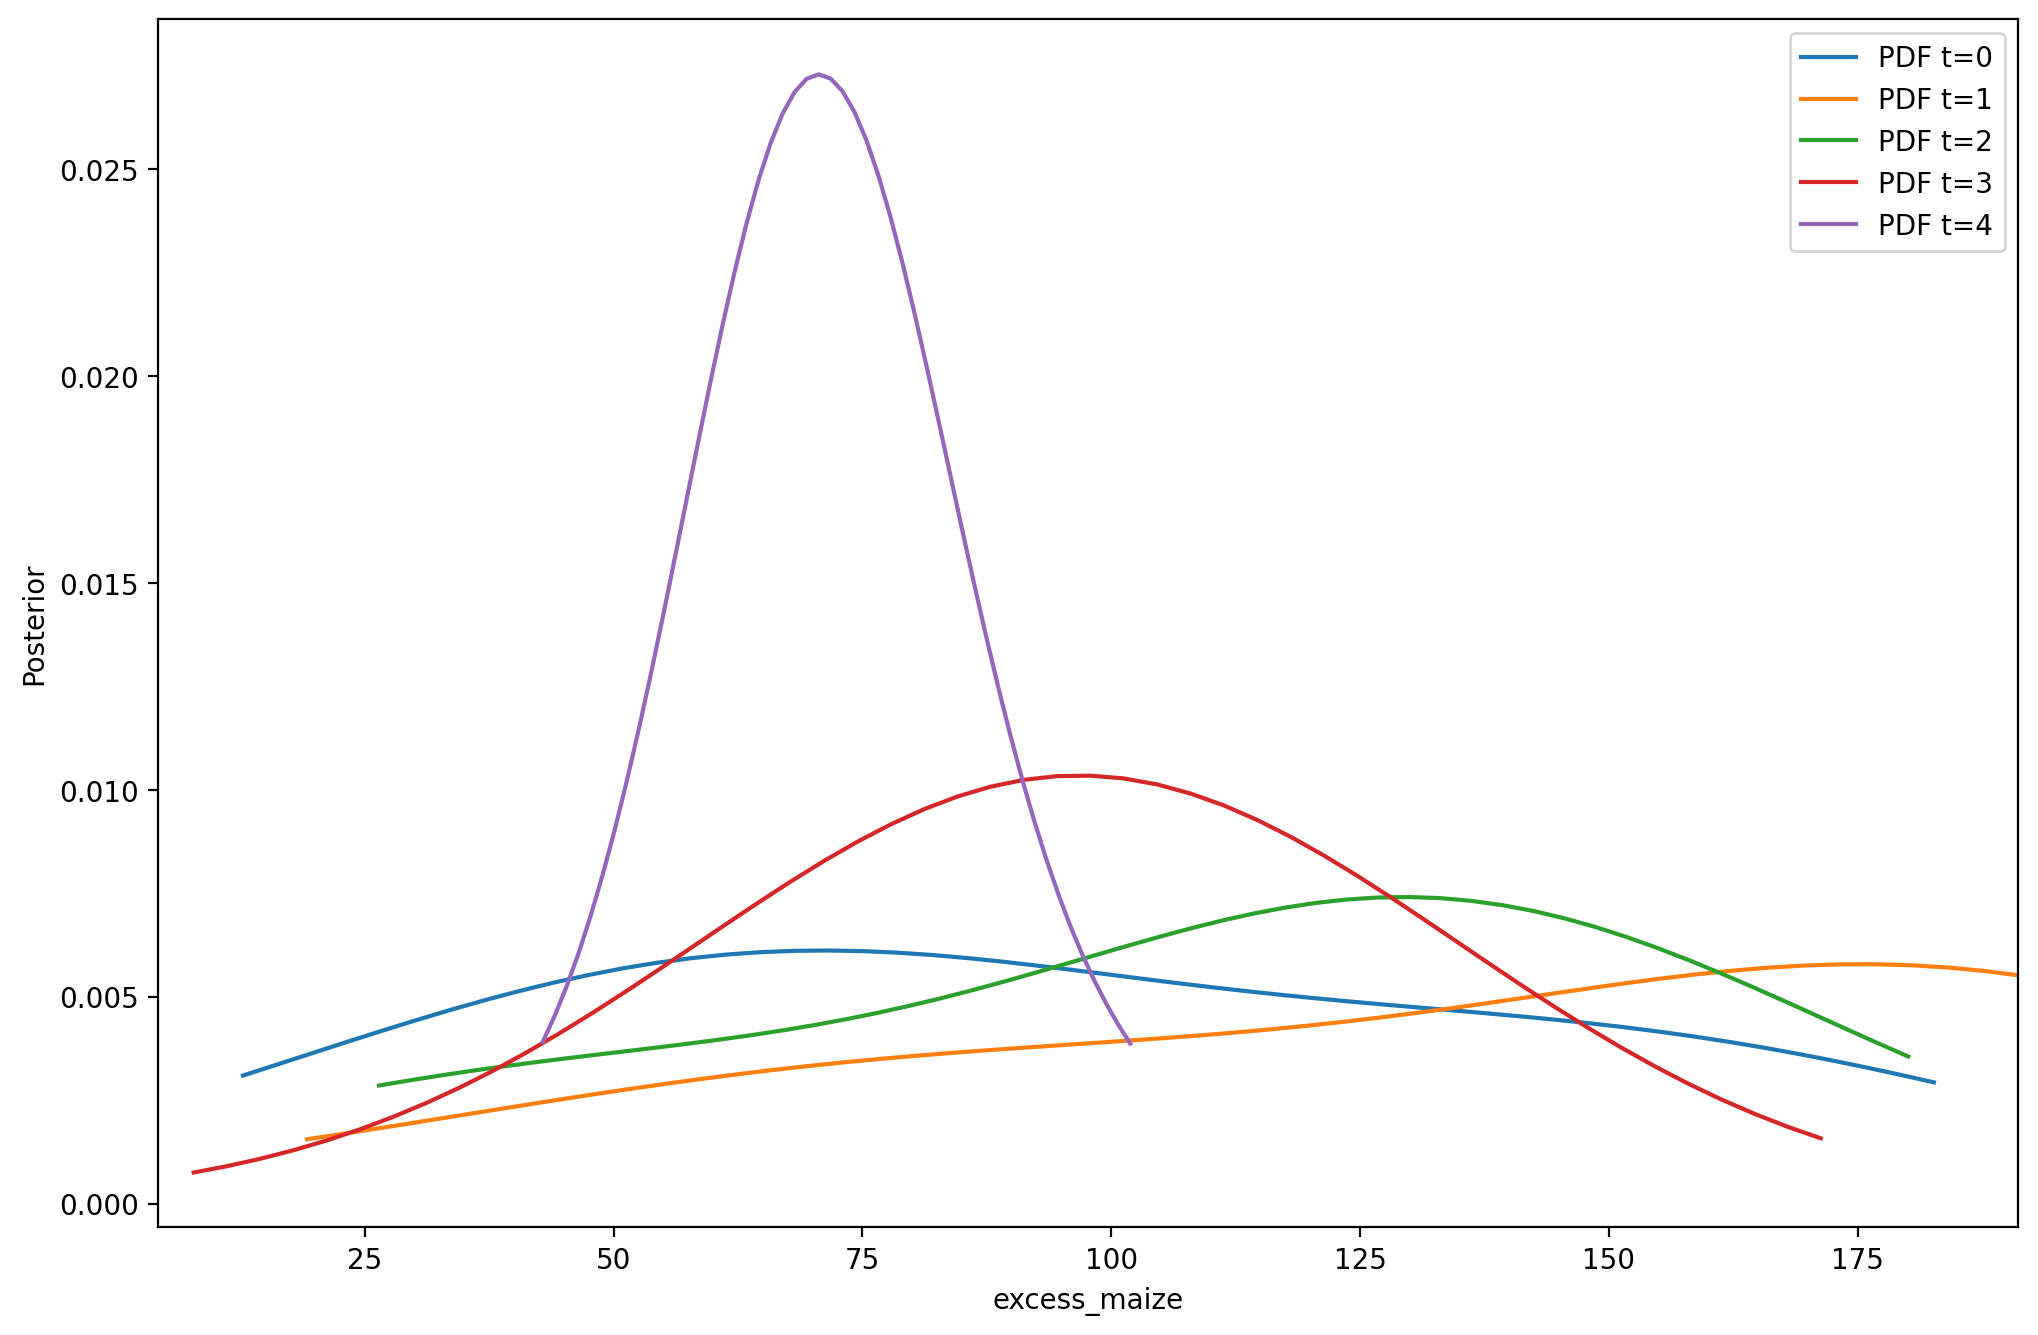

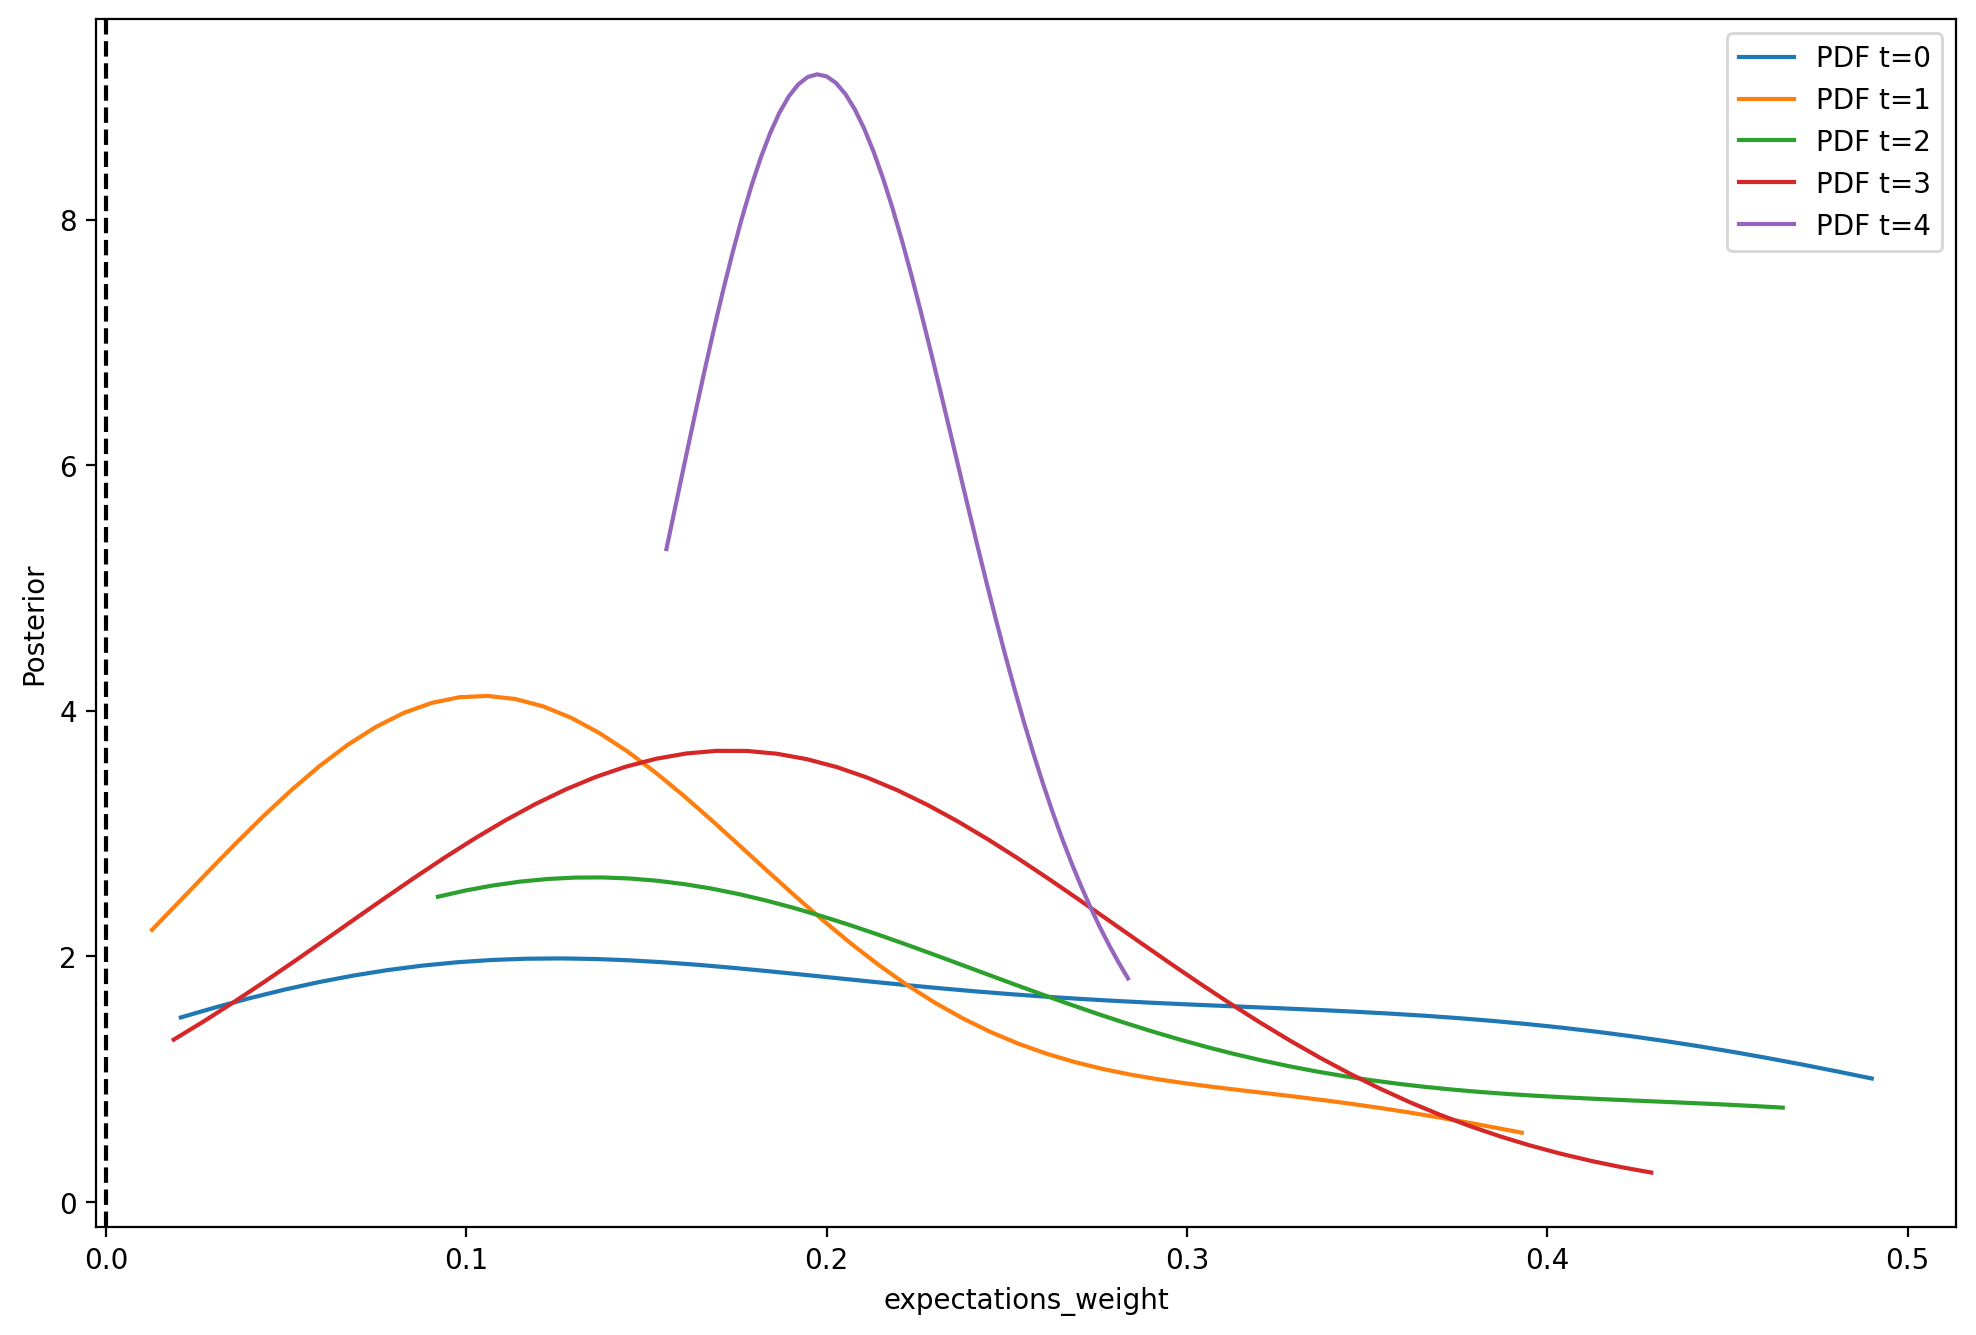

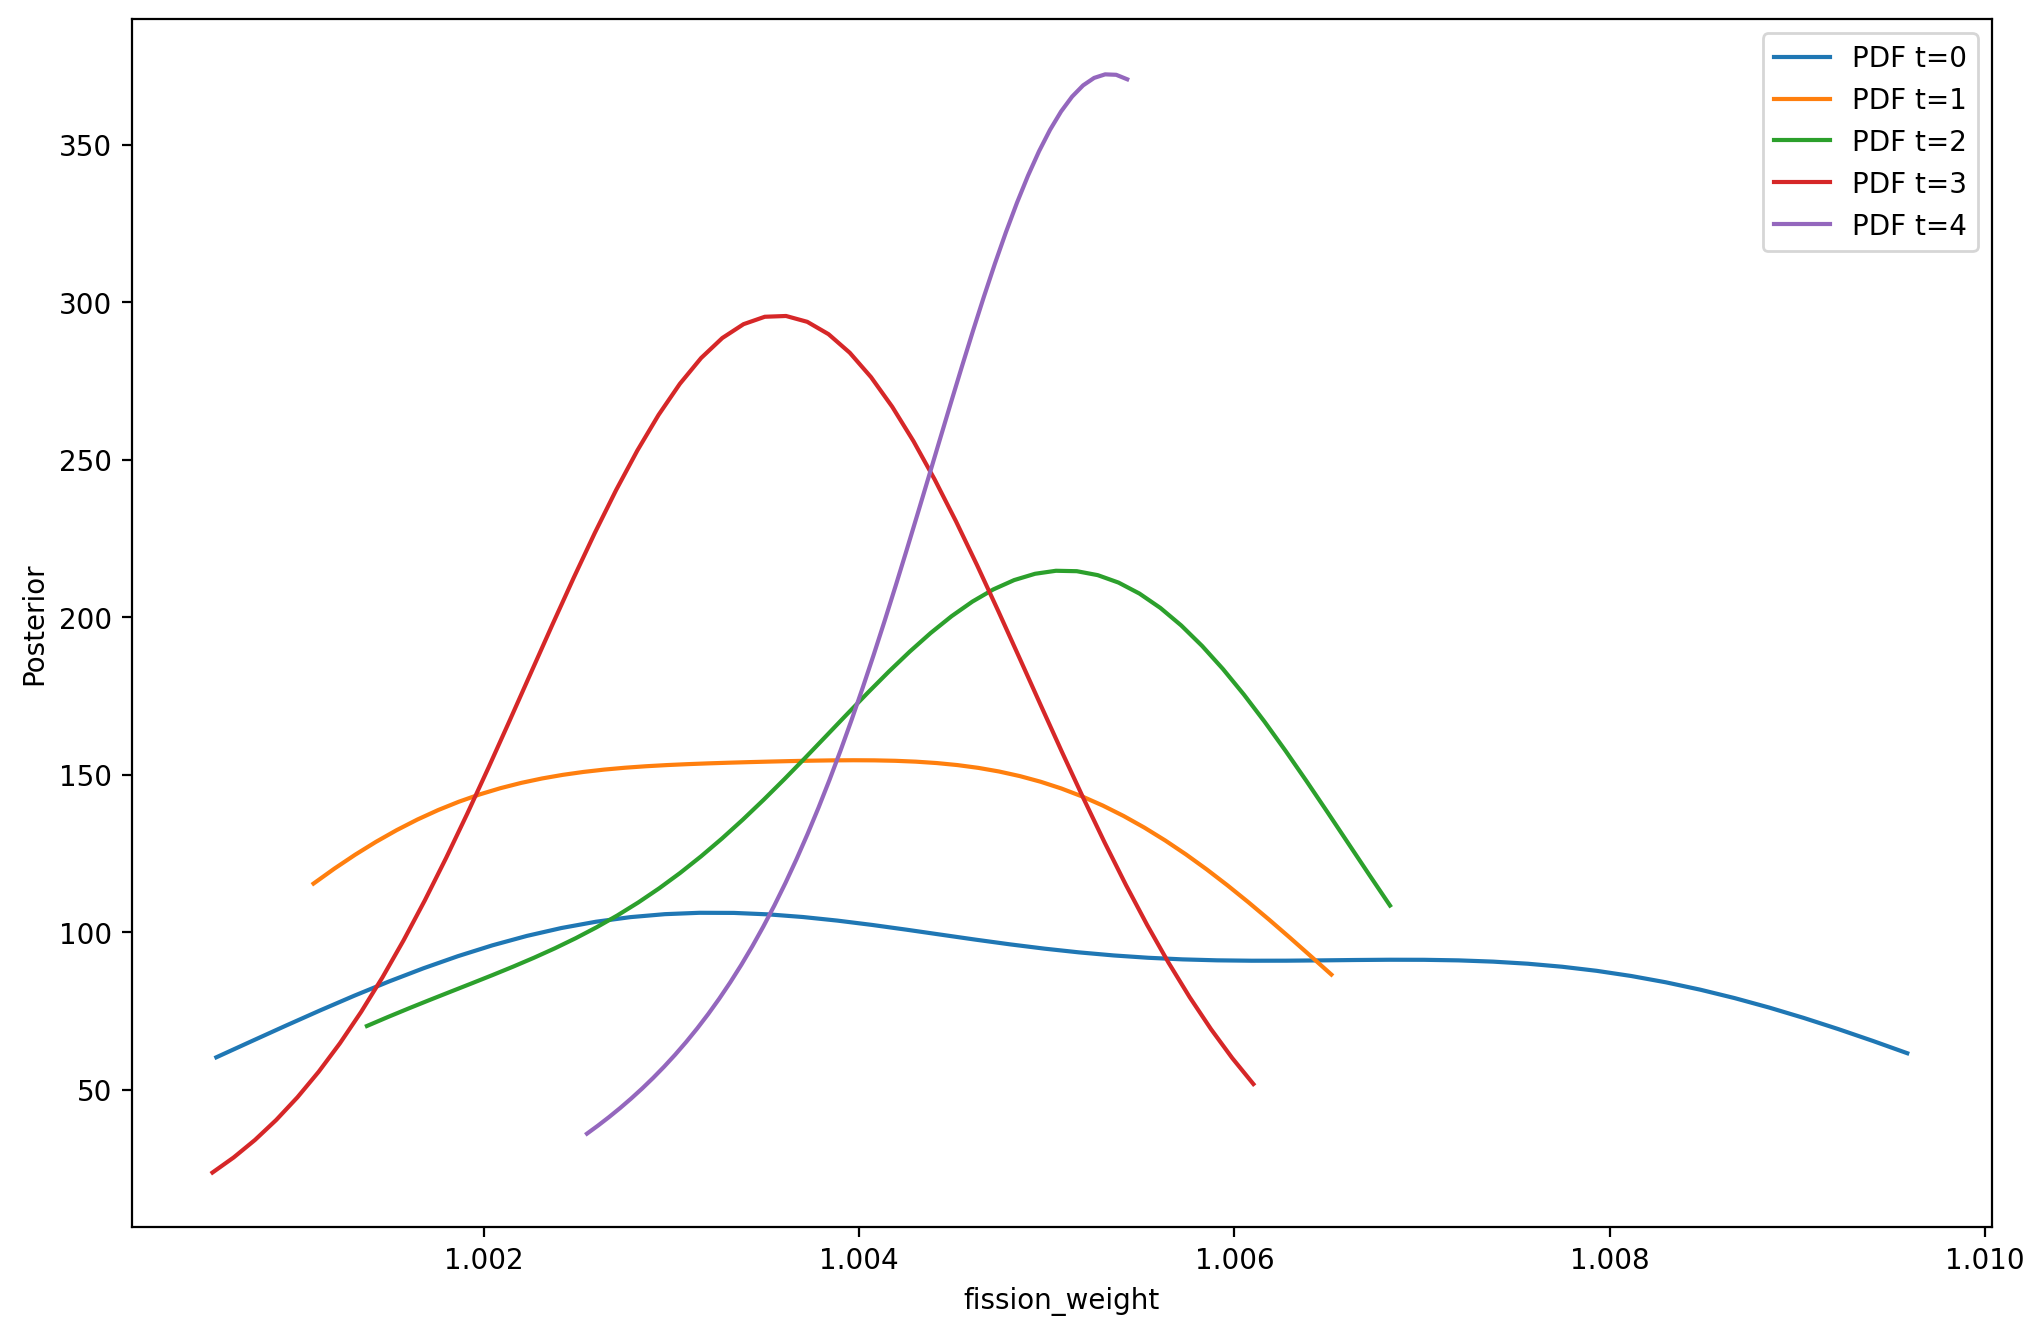

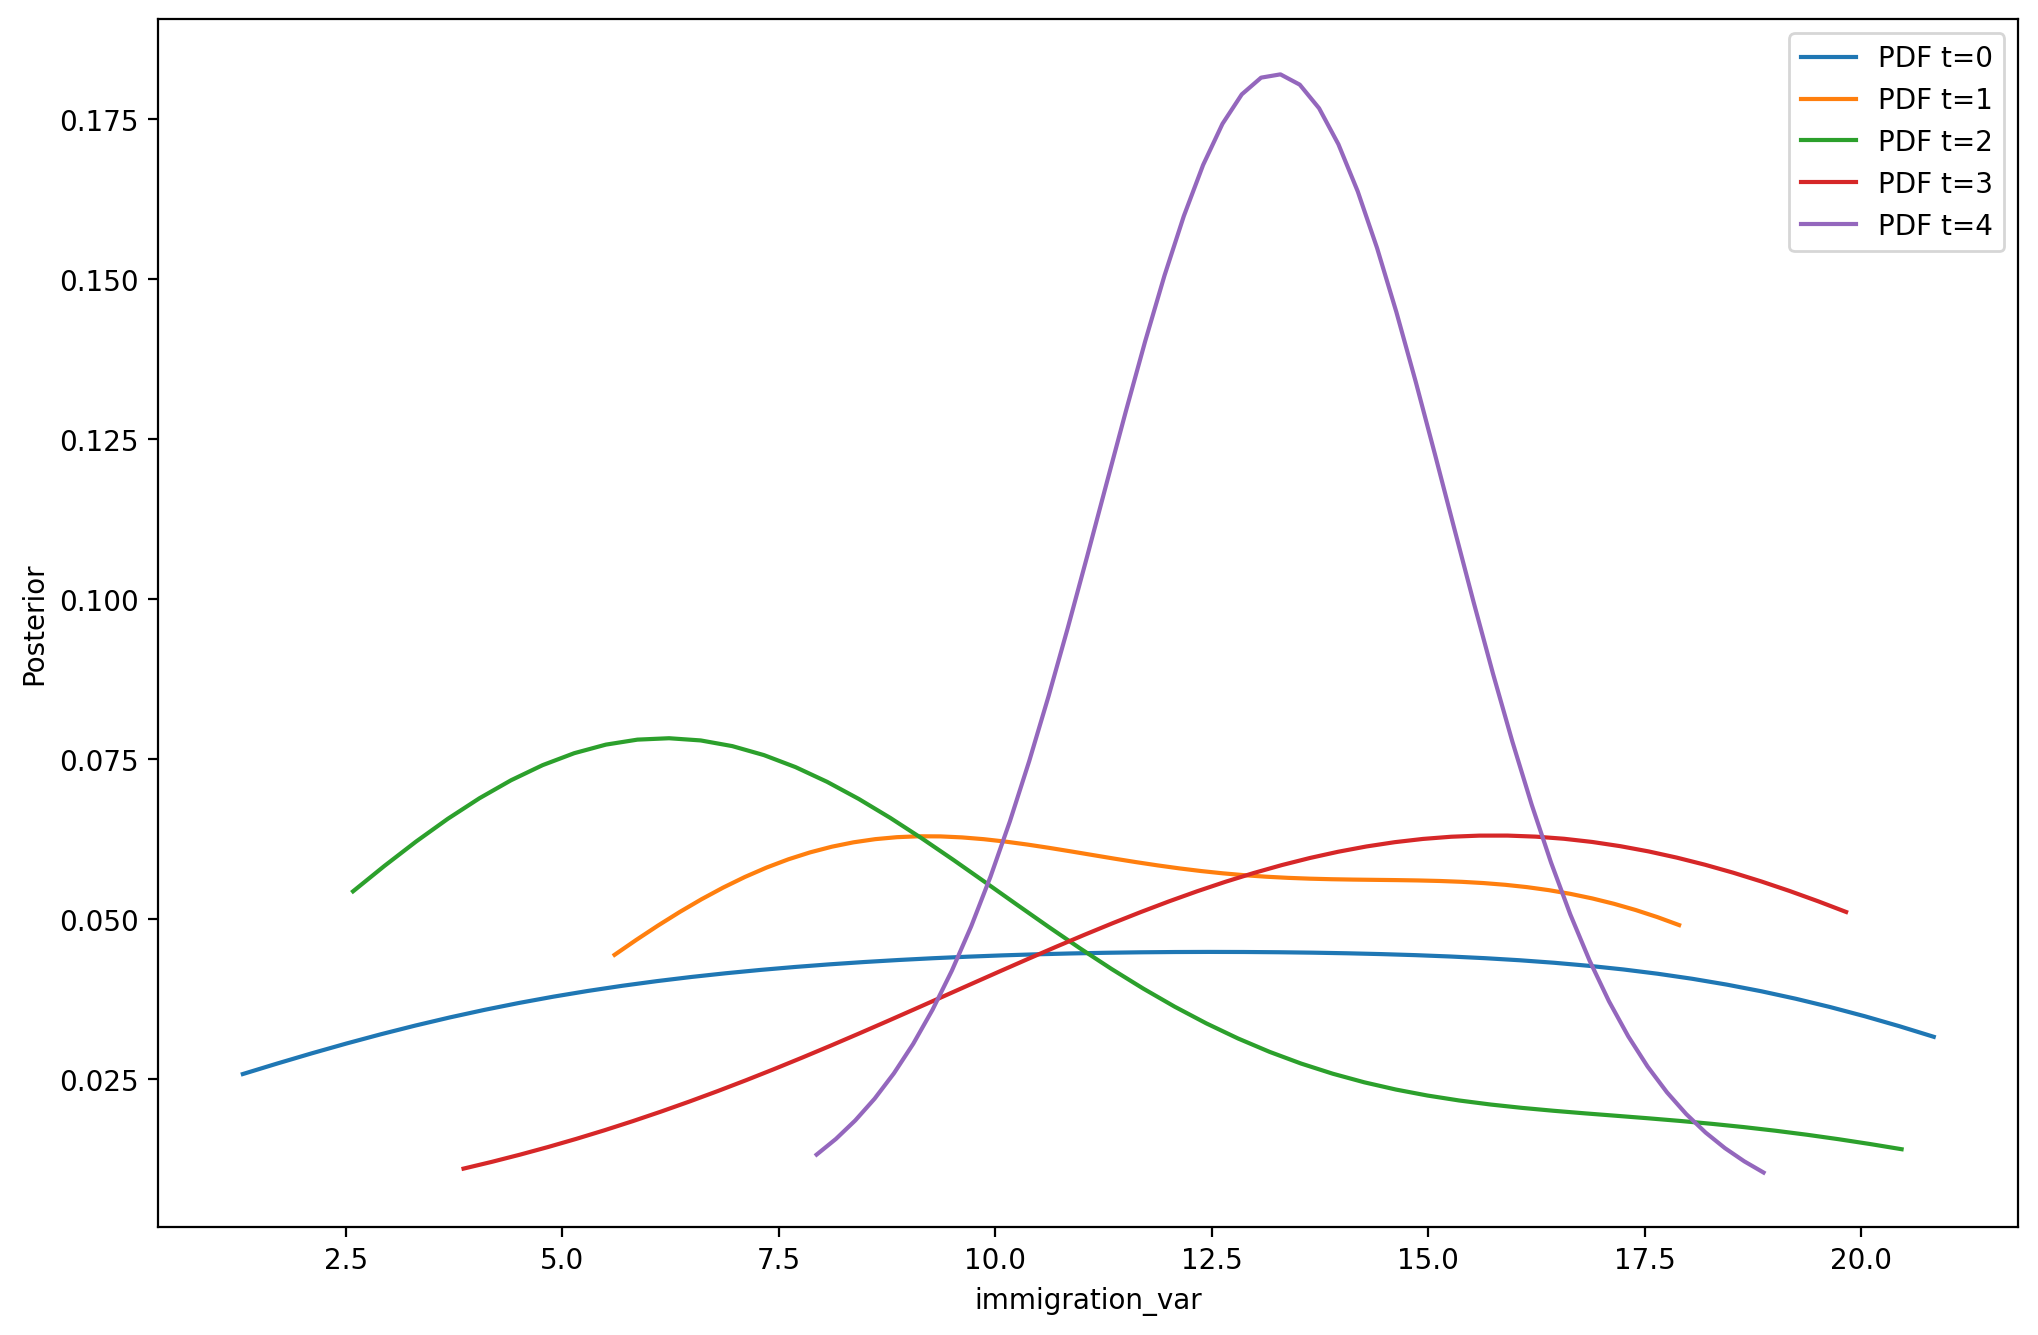

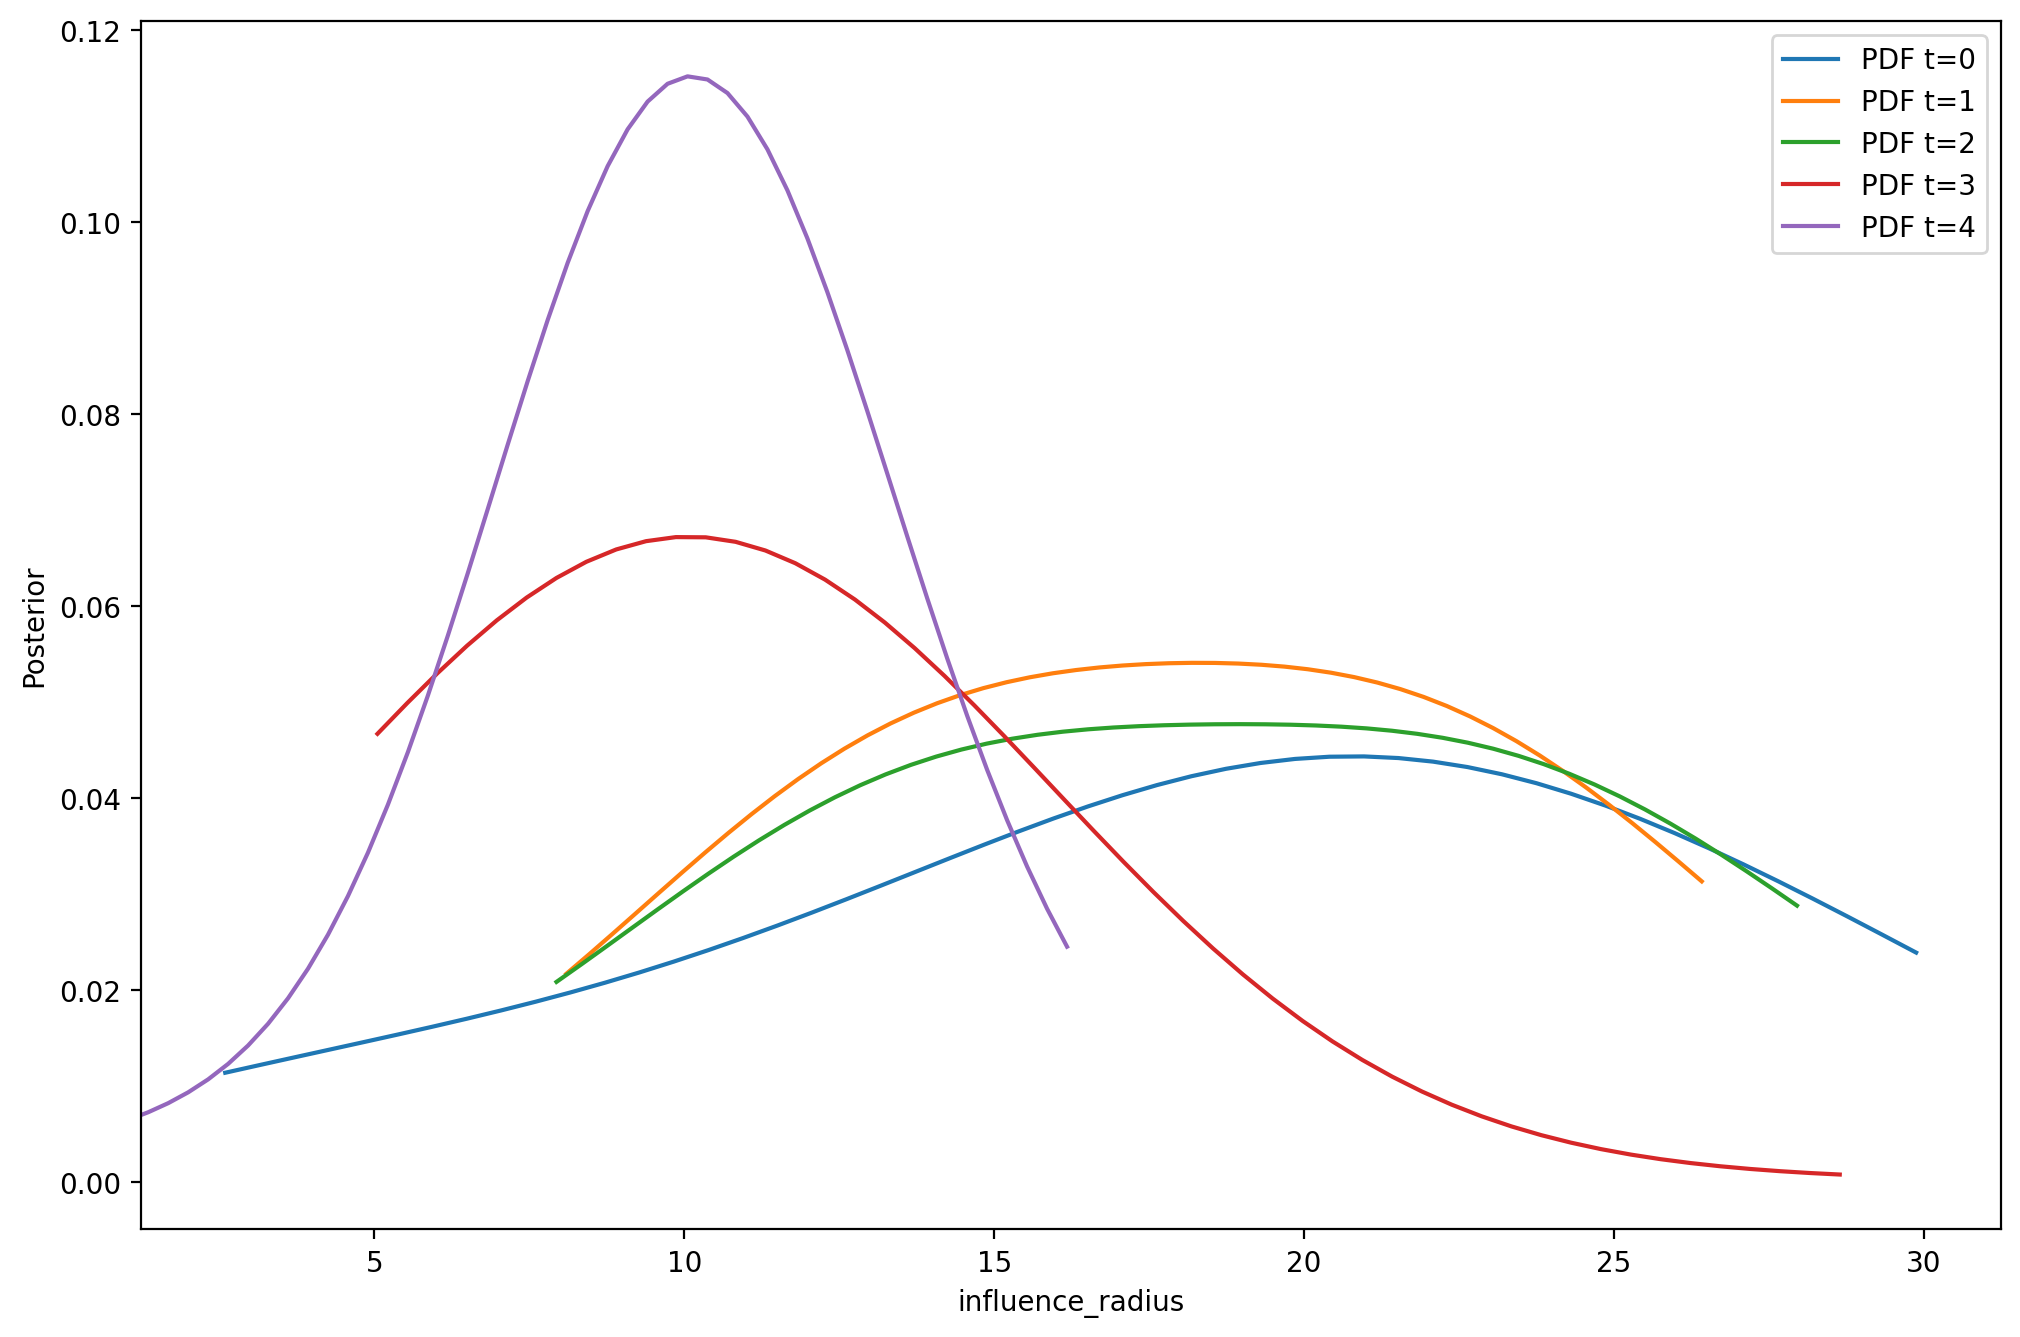

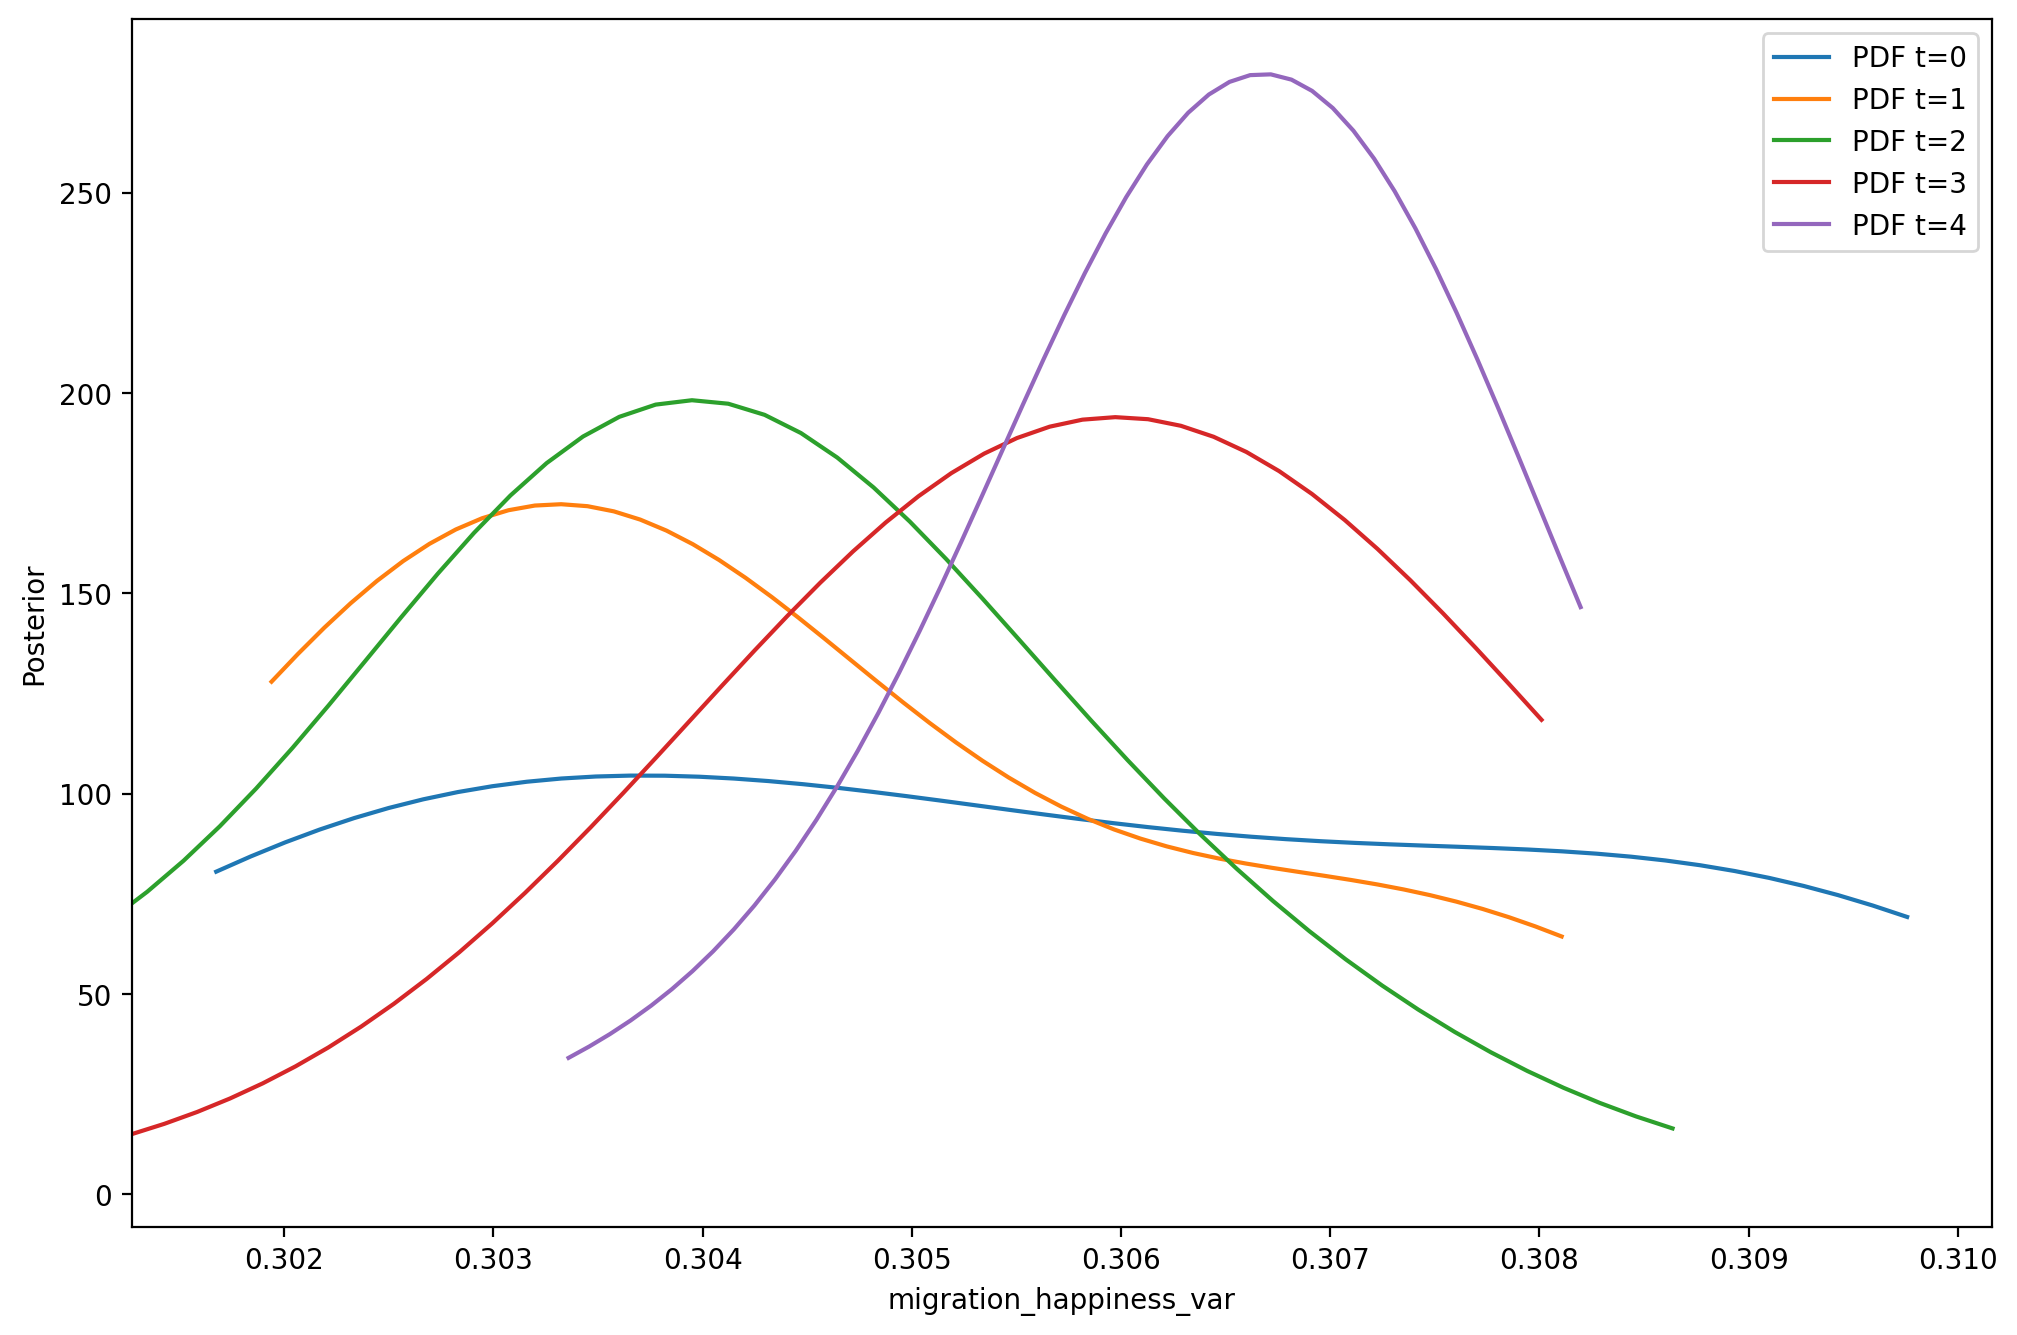

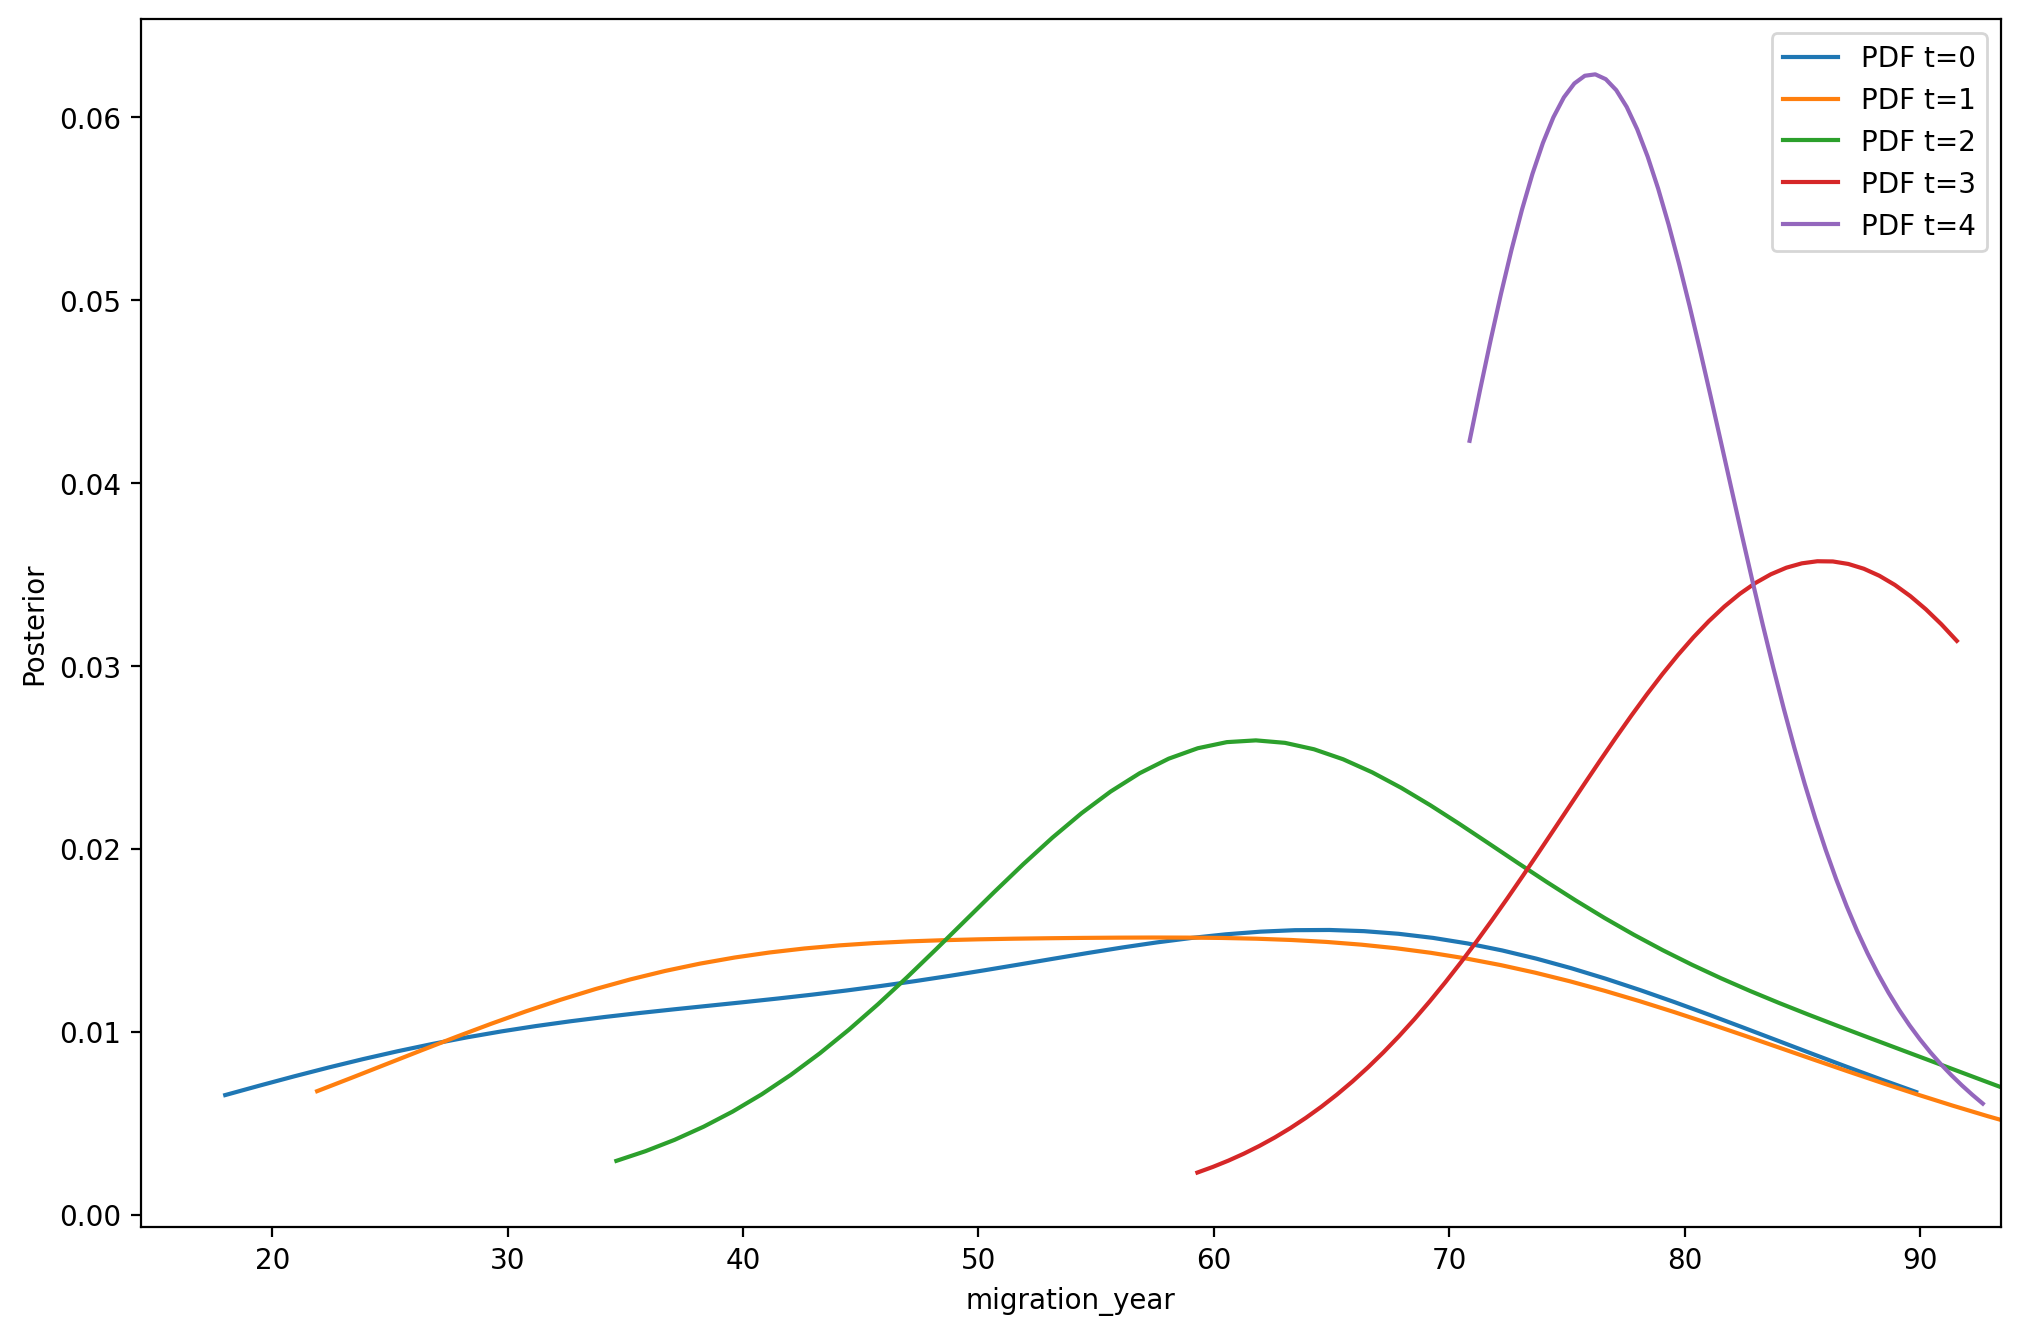

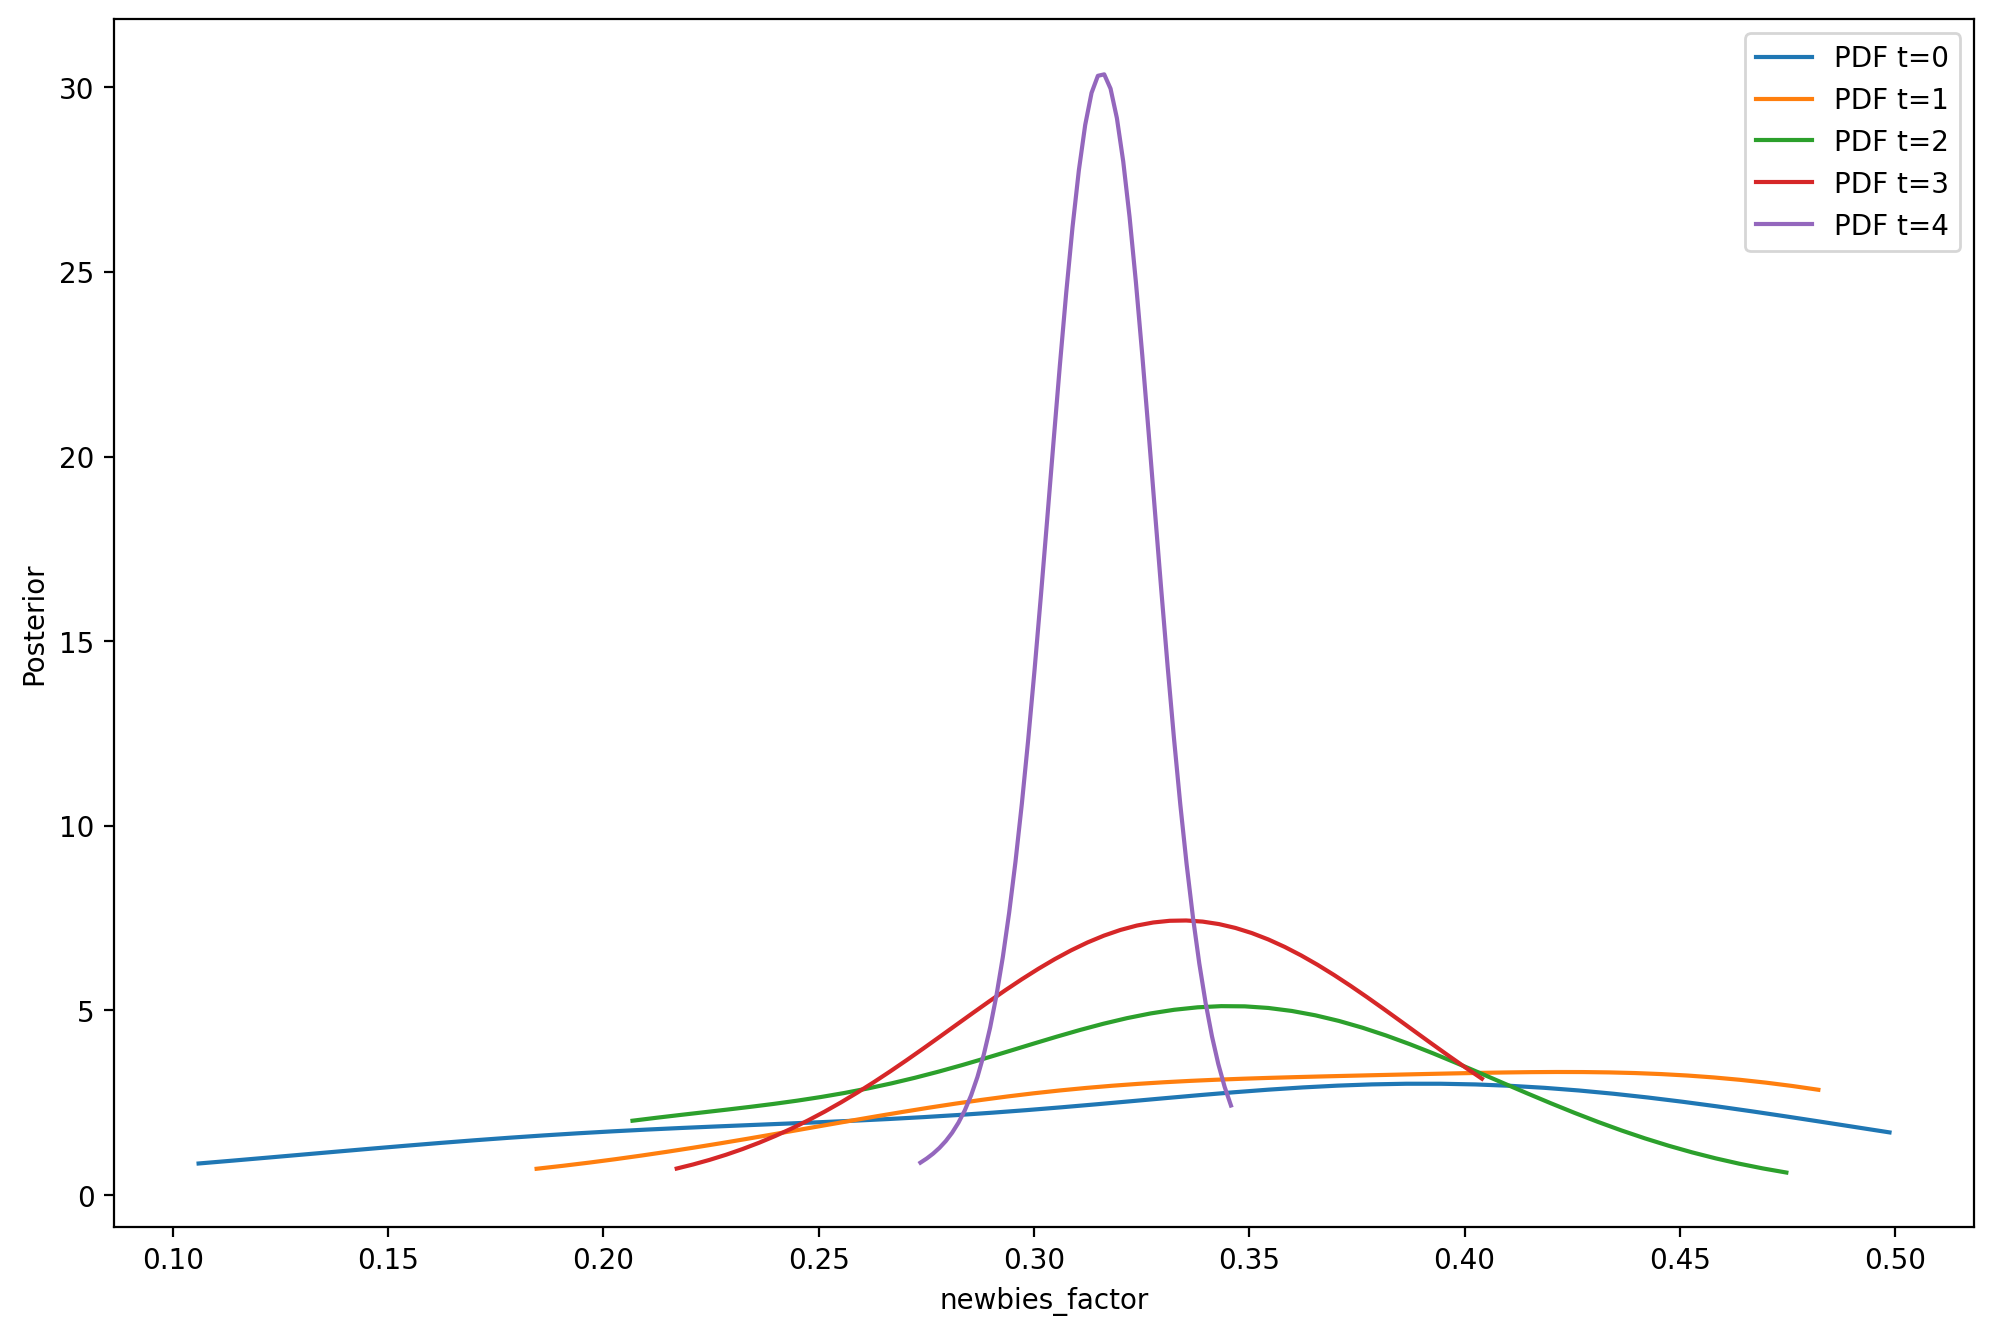

In [6]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

for param_name in parameter_priors.get_parameter_names():
    fig, ax = plt.subplots()
    for t in range(history.max_t+1):
        df, w = history.get_distribution(m=0, t=t)
        pyabc.visualization.plot_kde_1d(
            df, w,
#             xmin=28, xmax=32,
            x=param_name, ax=ax,
            label="PDF t={}".format(t))
    ax.axvline(color="k", linestyle="dashed");
    ax.legend();
    fig.savefig(str("plots/" + param_name))

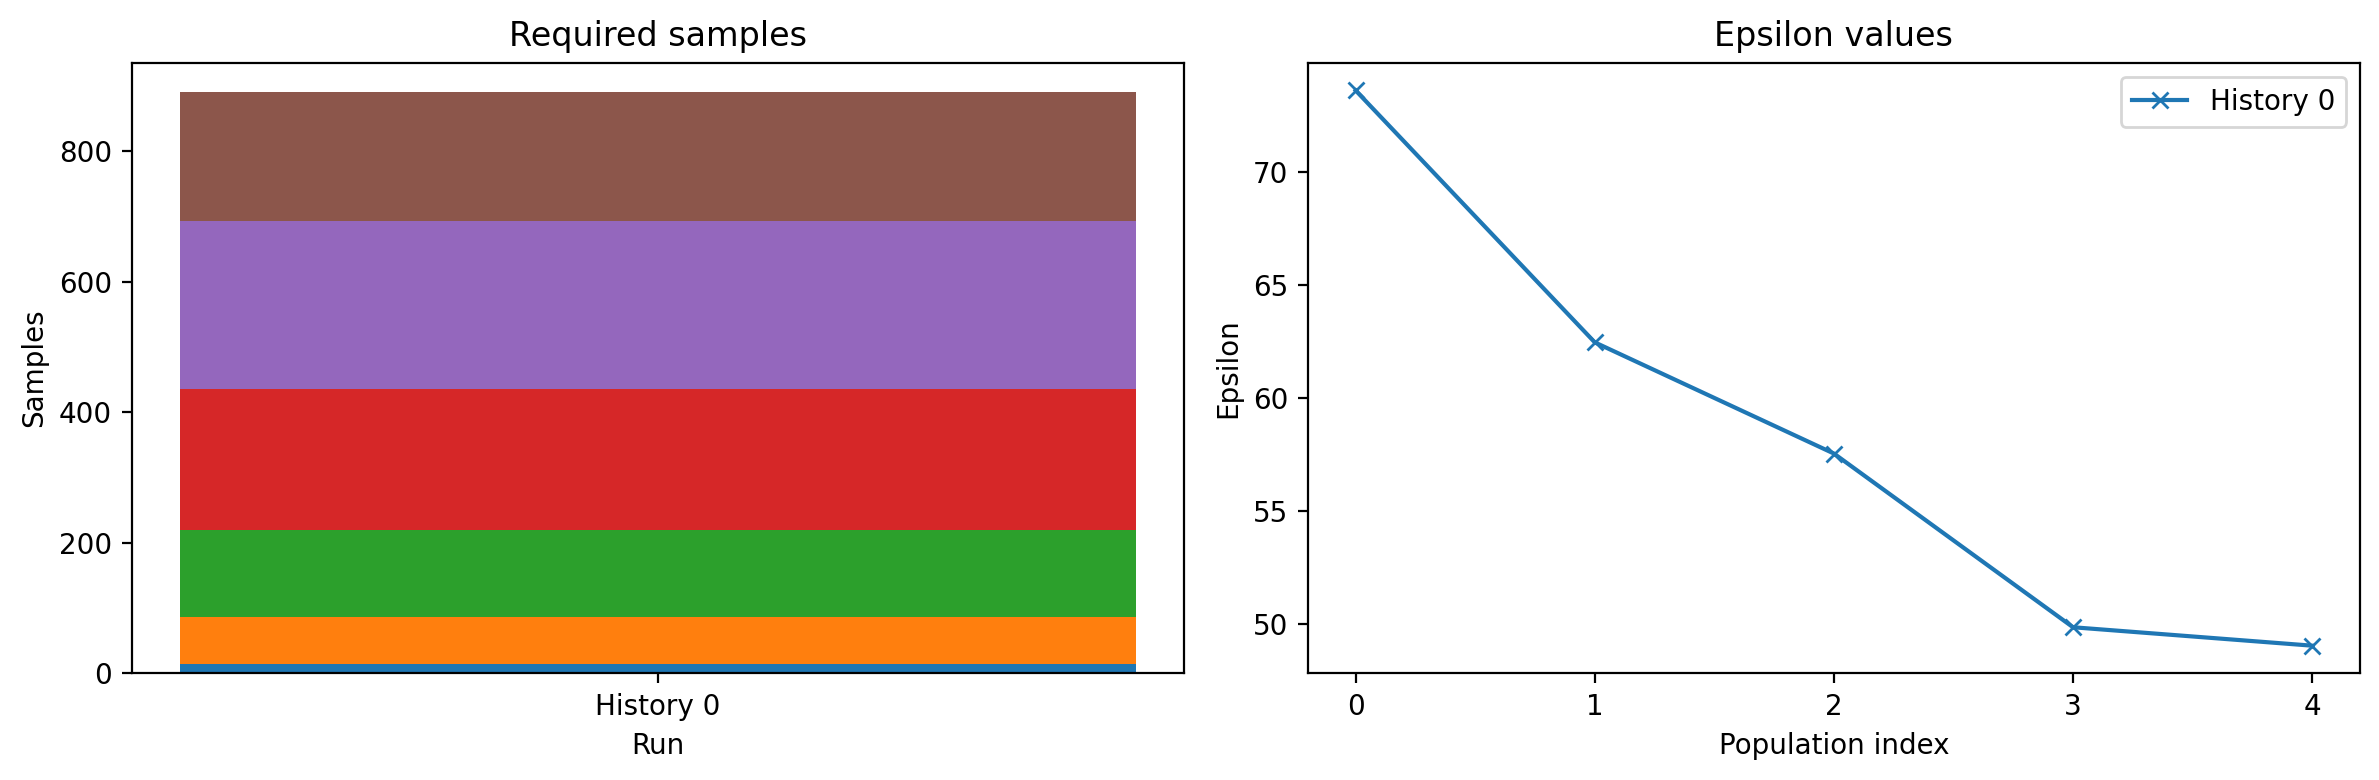

In [7]:
_, arr_ax = plt.subplots(1, 2)

pyabc.visualization.plot_sample_numbers(history, ax=arr_ax[0])
pyabc.visualization.plot_epsilons(history, ax=arr_ax[1])
# pyabc.visualization.plot_credible_intervals(
#     history, levels=[0.95, 0.9, 0.5], ts=[0, 1, 2, 3, 4],
#     show_mean=True, show_kde_max_1d=True, arr_ax=arr_ax[1][0])
# pyabc.visualization.plot_effective_sample_sizes(history, ax=arr_ax[1][1])

plt.gcf().set_size_inches((12, 4))
plt.gcf().tight_layout()
plt.gcf().savefig("plots/epsilon_and_samples.png")

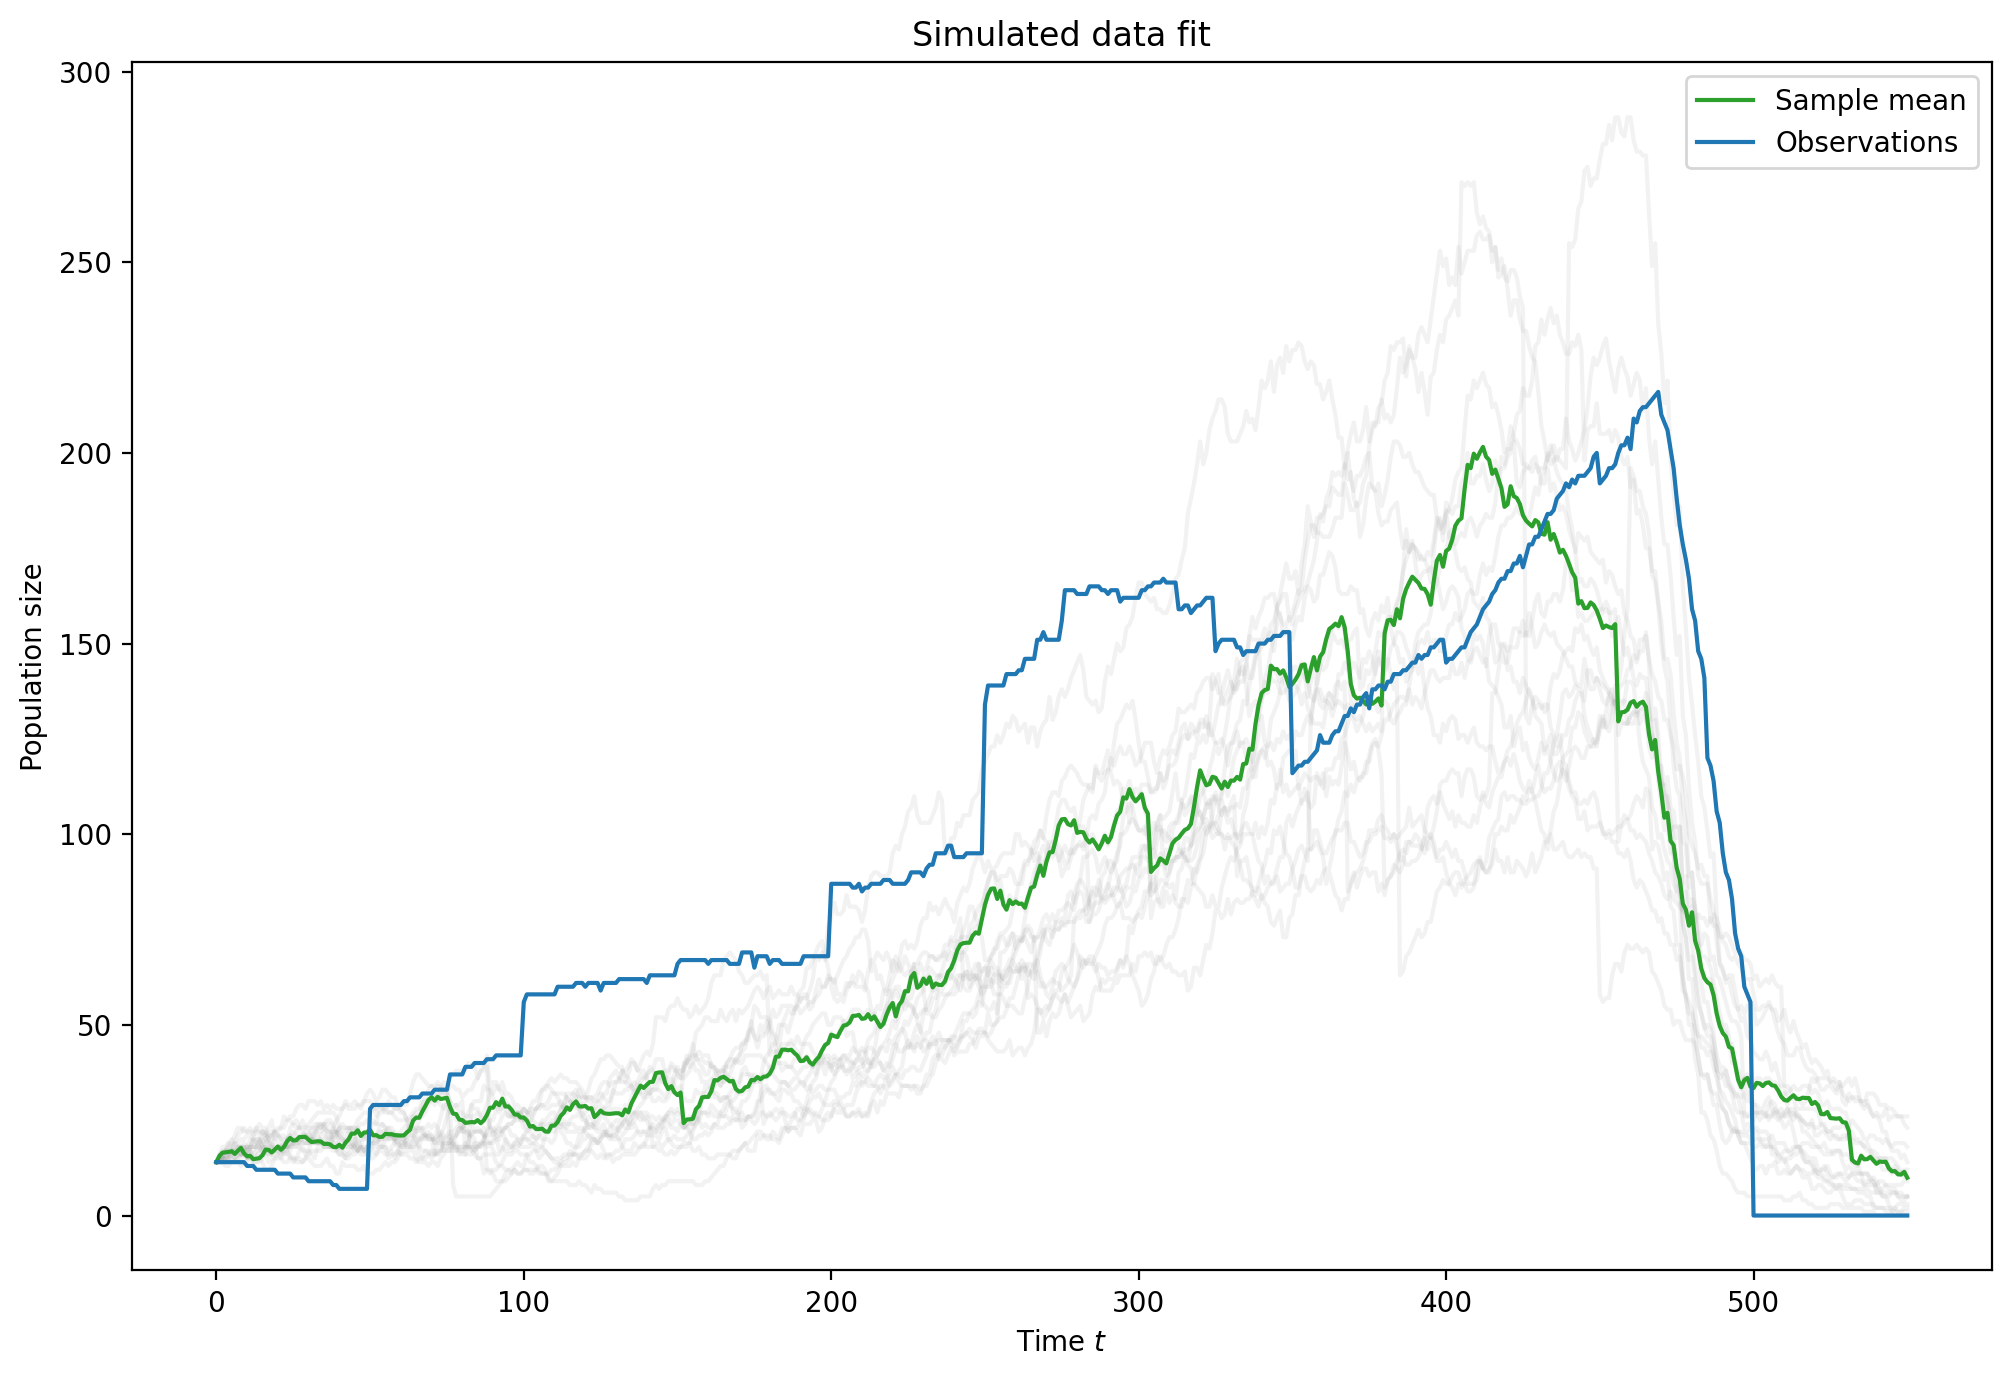

In [8]:
from pyabc.visualization import plot_kde_2d, plot_data_callback

_, ax = plt.subplots()
measurement_times = np.arange(len(target_data))
def plot_data(sum_stat, weight, ax, **kwargs):
    """Plot a single trajectory"""
    ax.plot(measurement_times, sum_stat['population'], color='grey', alpha=0.1)

def plot_mean(sum_stats, weights, ax, **kwargs):
    """Plot mean over all samples"""
    weights = np.array(weights)
    weights /= weights.sum()
    data = np.array([sum_stat['population'] for sum_stat in sum_stats])
    mean = (data * weights.reshape((-1, 1))).sum(axis=0)
    ax.plot(measurement_times, mean, color='C2', label='Sample mean')

ax = plot_data_callback(history, plot_data, plot_mean, ax=ax)

plt.plot(target_data, color="C0", label='Observations')
# plt.scatter(measurement_times, target_data,
#             color="C1", label='Observations data points')
plt.xlabel('Time $t$')
plt.ylabel('Population size')
plt.title('Simulated data fit')
plt.legend()

plt.gcf().savefig("plots/simulations_vs_obs.png")
plt.show()